<a href="https://colab.research.google.com/github/Aditya-Kopulwar/Data-Science-Assignments/blob/main/Assignment_07_Clustering/Code/Q2_East_West_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

## Data Description:

*The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers*

- ID : Unique ID

- Balance : Number of miles eligible for award travel

- Qual_mile--Number of miles counted as qualifying for Topflight status

- cc1_miles : Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles : Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles : Number of miles earned with Small Business credit card in the past 12 months:

    * 1 = under 5,000
    * 2 = 5,000 - 10,000
    * 3 = 10,001 - 25,000
    * 4 = 25,001 - 50,000
    * 5 = over 50,000

- Bonus_miles : Number of miles earned from non-flight bonus transactions in the past 12 months

- Bonus_trans : Number of non-flight bonus transactions in the past 12 months

- Flight_miles_12mo : Number of flight miles in the past 12 months

- Flight_trans_12 : Number of flight transactions in the past 12 months

- Days_since_enrolled : Number of days since enrolled in flier program

- Award : whether that person had award flight (free flight) or not

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 2500x1250 with 0 Axes>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Adding Dataset

In [3]:
import pandas as pd
ewa = pd.read_excel(r"/content/EastWestAirlines.xlsx",sheet_name='data')

ewa.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [4]:
ewa.drop(columns = ['ID#'], inplace = True)

ewa

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [5]:
ewa_nrow = ewa.shape[0]

In [ ]:
def lost_record():

    ewa_nrow_now = ewa.shape[0]
    lost = ewa_nrow - ewa_nrow_now
    lost = (lost/ewa_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [ ]:
ewa.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [ ]:
ewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [ ]:
ewa.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [ ]:
uni(ewa)



 All Unique Value in Balance
[      0      50      68 ... 1199220 1302051 1704838]
Total no of unique values 3904

 All Unique Value in Qual_miles
[    0   250   500   588   589   629   651   719   733   739   745   763
   783   810   862   867   888   899   909   925   948   957   967   972
  1000  1005  1024  1082  1094  1099  1112  1115  1121  1178  1182  1199
  1249  1250  1362  1374  1388  1440  1448  1452  1467  1490  1505  1514
  1526  1604  1619  1621  1651  1674  1678  1692  1697  1704  1739  1745
  1754  1761  1776  1846  1896  1952  2000  2015  2024  2066  2081  2092
  2128  2139  2178  2194  2253  2273  2288  2305  2329  2360  2364  2370
  2376  2395  2396  2398  2408  2433  2454  2505  2543  2556  2562  2565
  2576  2586  2600  2611  2643  2704  2706  2738  2788  2880  2900  2919
  2947  2954  2975  2998  3071  3418  3445  3490  3508  3576  3649  3692
  3818  3861  3867  3953  4081  4116  4301  4361  4481  4670  4704  4727
  4844  4877  4903  4924  4929  5009  5031  5051 

### Checking for Duplicated Values

In [ ]:
ewa[ewa.duplicated()]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3876     1000           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3876            0                  0                0               1597   

      Award?  
3876       0

- There is 1 duplicate vale in are dataset

In [ ]:
ewa.drop_duplicates(inplace = True)

In [ ]:
ewa[ewa.duplicated()]

Empty DataFrame
Columns: [Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []

- There is no duplicate vale in are dataset now

### Visualizing The Data

#### Ploting Boxplot

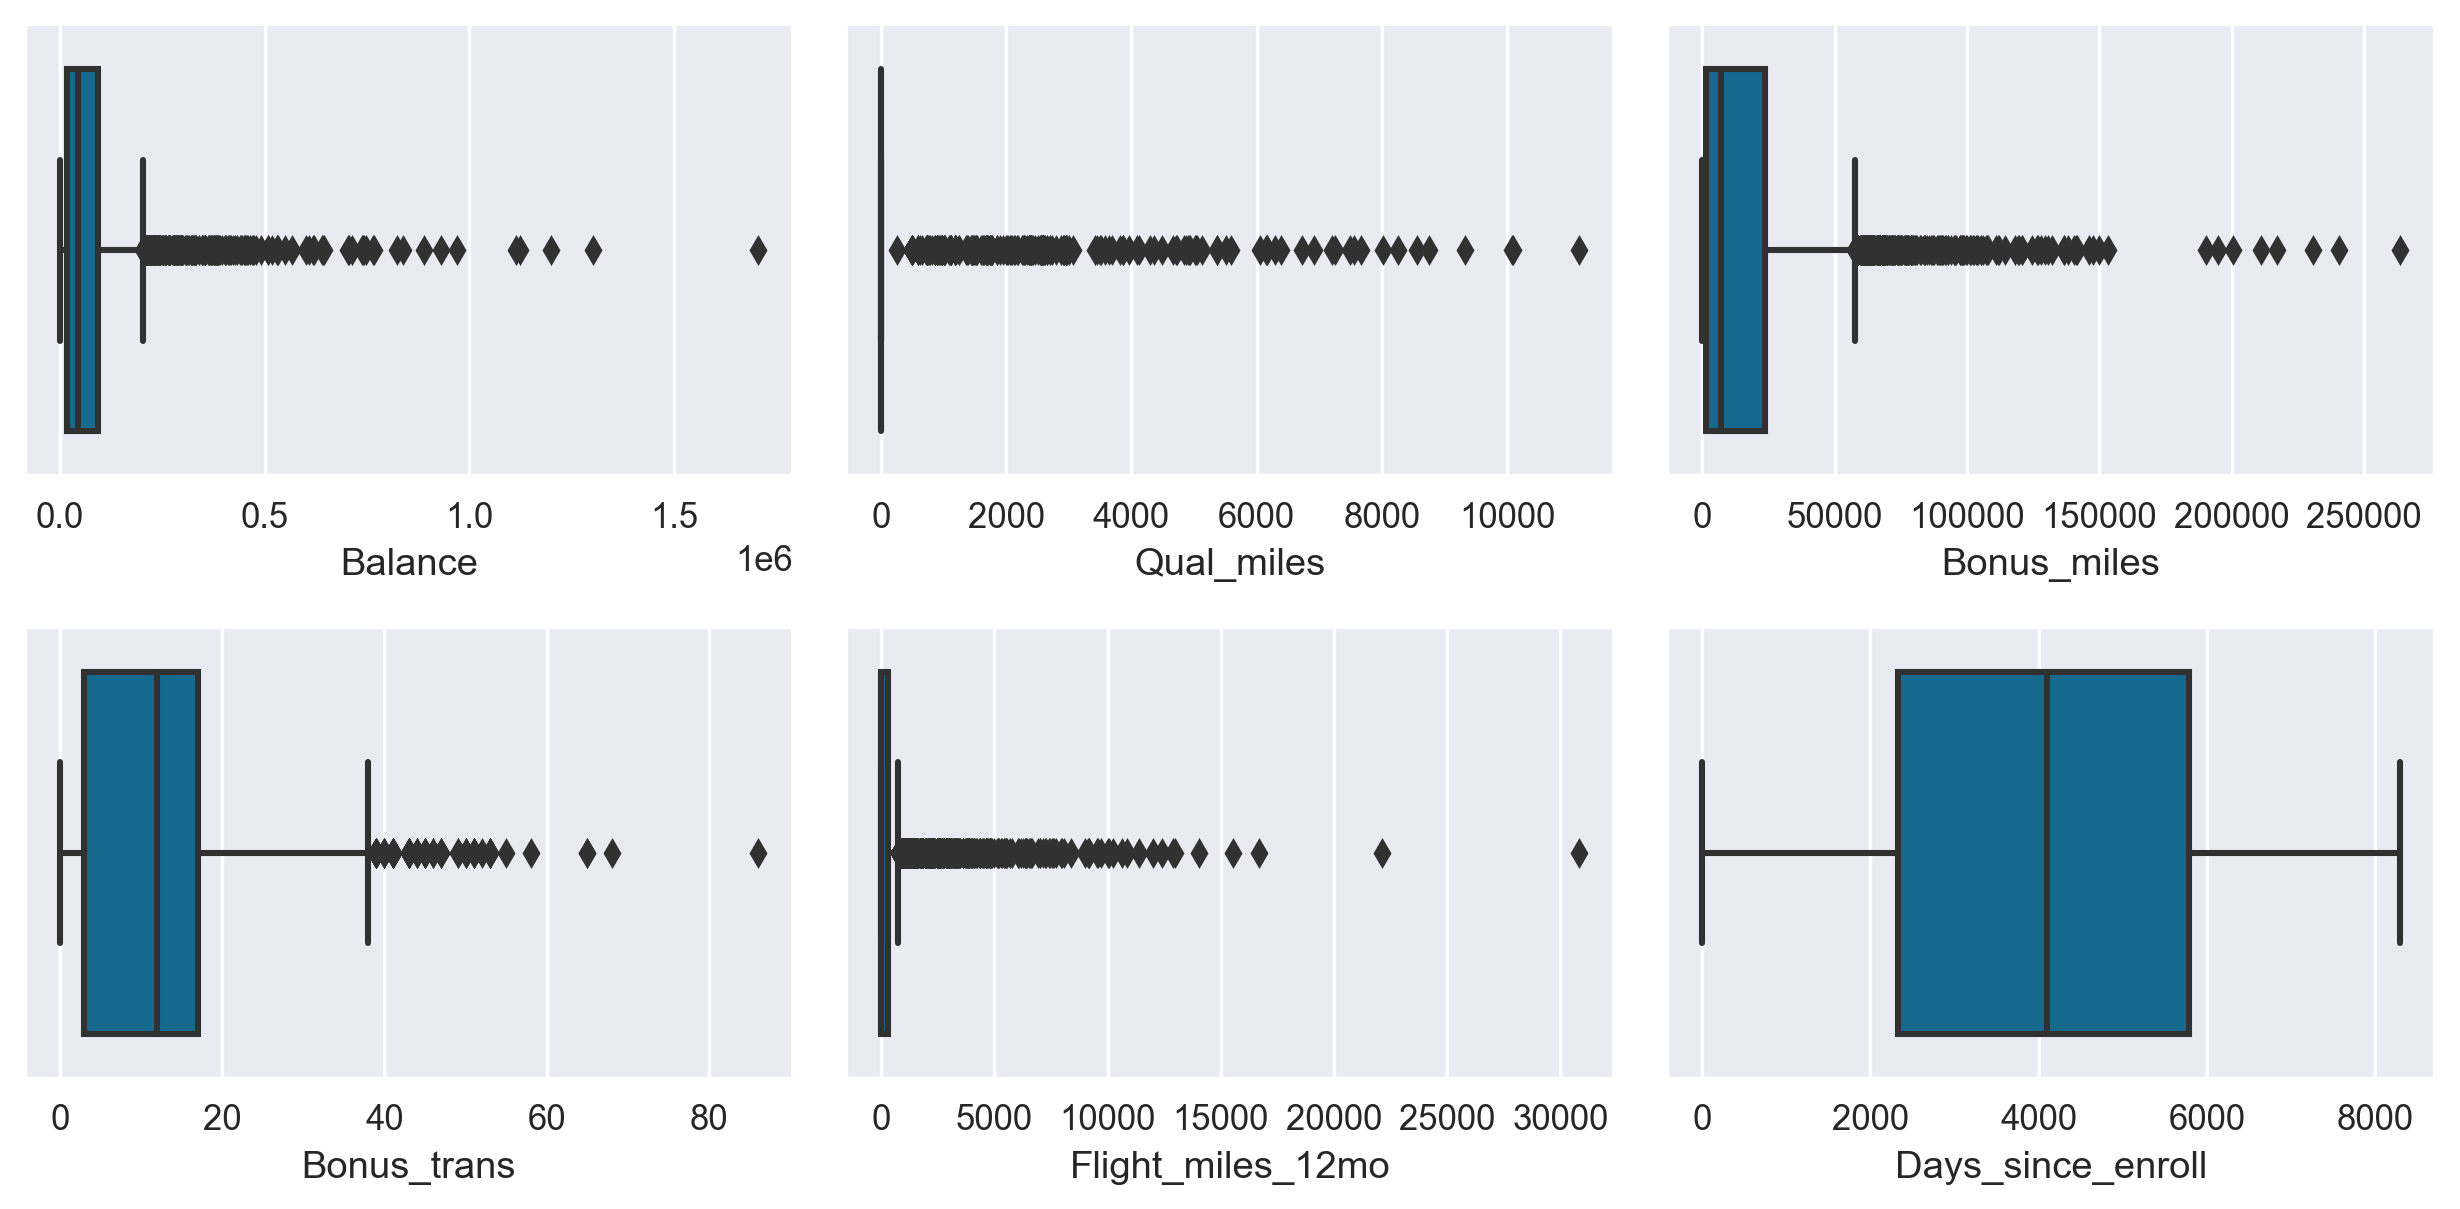

In [ ]:
fig, ax = plt.subplots(2,3)

sns.boxplot(ewa['Balance'], ax = ax[0,0])
sns.boxplot(ewa['Qual_miles'], ax = ax[0,1])
sns.boxplot(ewa['Bonus_miles'], ax = ax[0,2])
sns.boxplot(ewa['Bonus_trans'], ax = ax[1,0])
sns.boxplot(ewa['Flight_miles_12mo'], ax = ax[1,1])
sns.boxplot(ewa['Days_since_enroll'], ax = ax[1,2])

plt.tight_layout()

#### Ploting Histplot

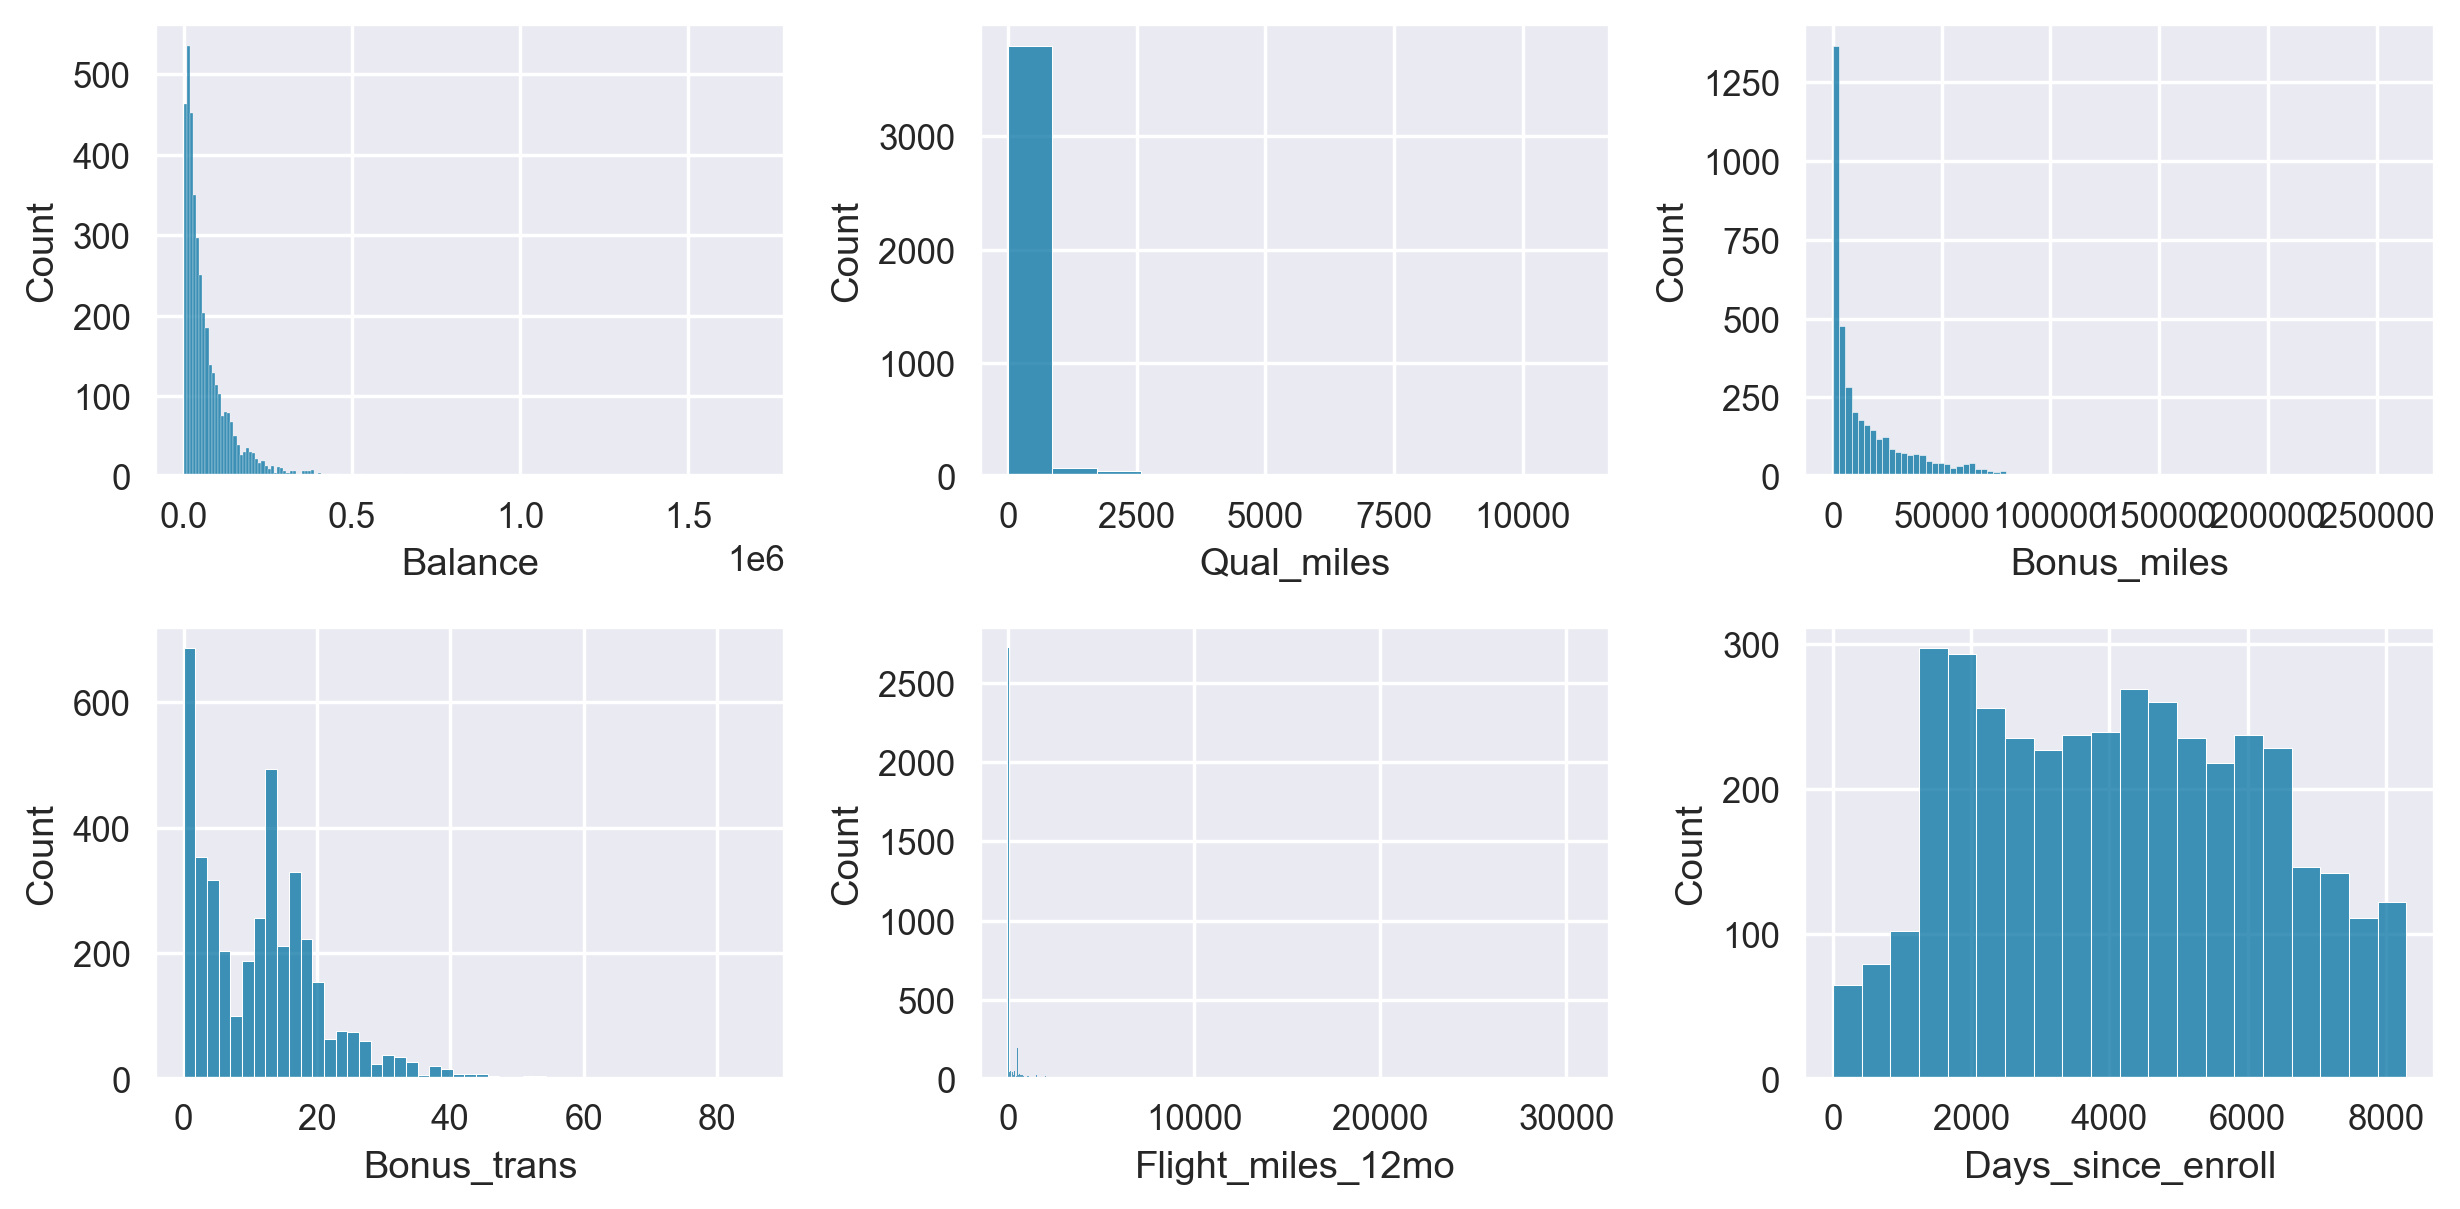

In [ ]:
fig, ax = plt.subplots(2,3)

sns.histplot(ewa['Balance'], ax = ax[0,0])
sns.histplot(ewa['Qual_miles'], ax = ax[0,1])
sns.histplot(ewa['Bonus_miles'], ax = ax[0,2])
sns.histplot(ewa['Bonus_trans'], ax = ax[1,0])
sns.histplot(ewa['Flight_miles_12mo'], ax = ax[1,1])
sns.histplot(ewa['Days_since_enroll'], ax = ax[1,2])

plt.tight_layout()

#### Ploting Q-Q Plot

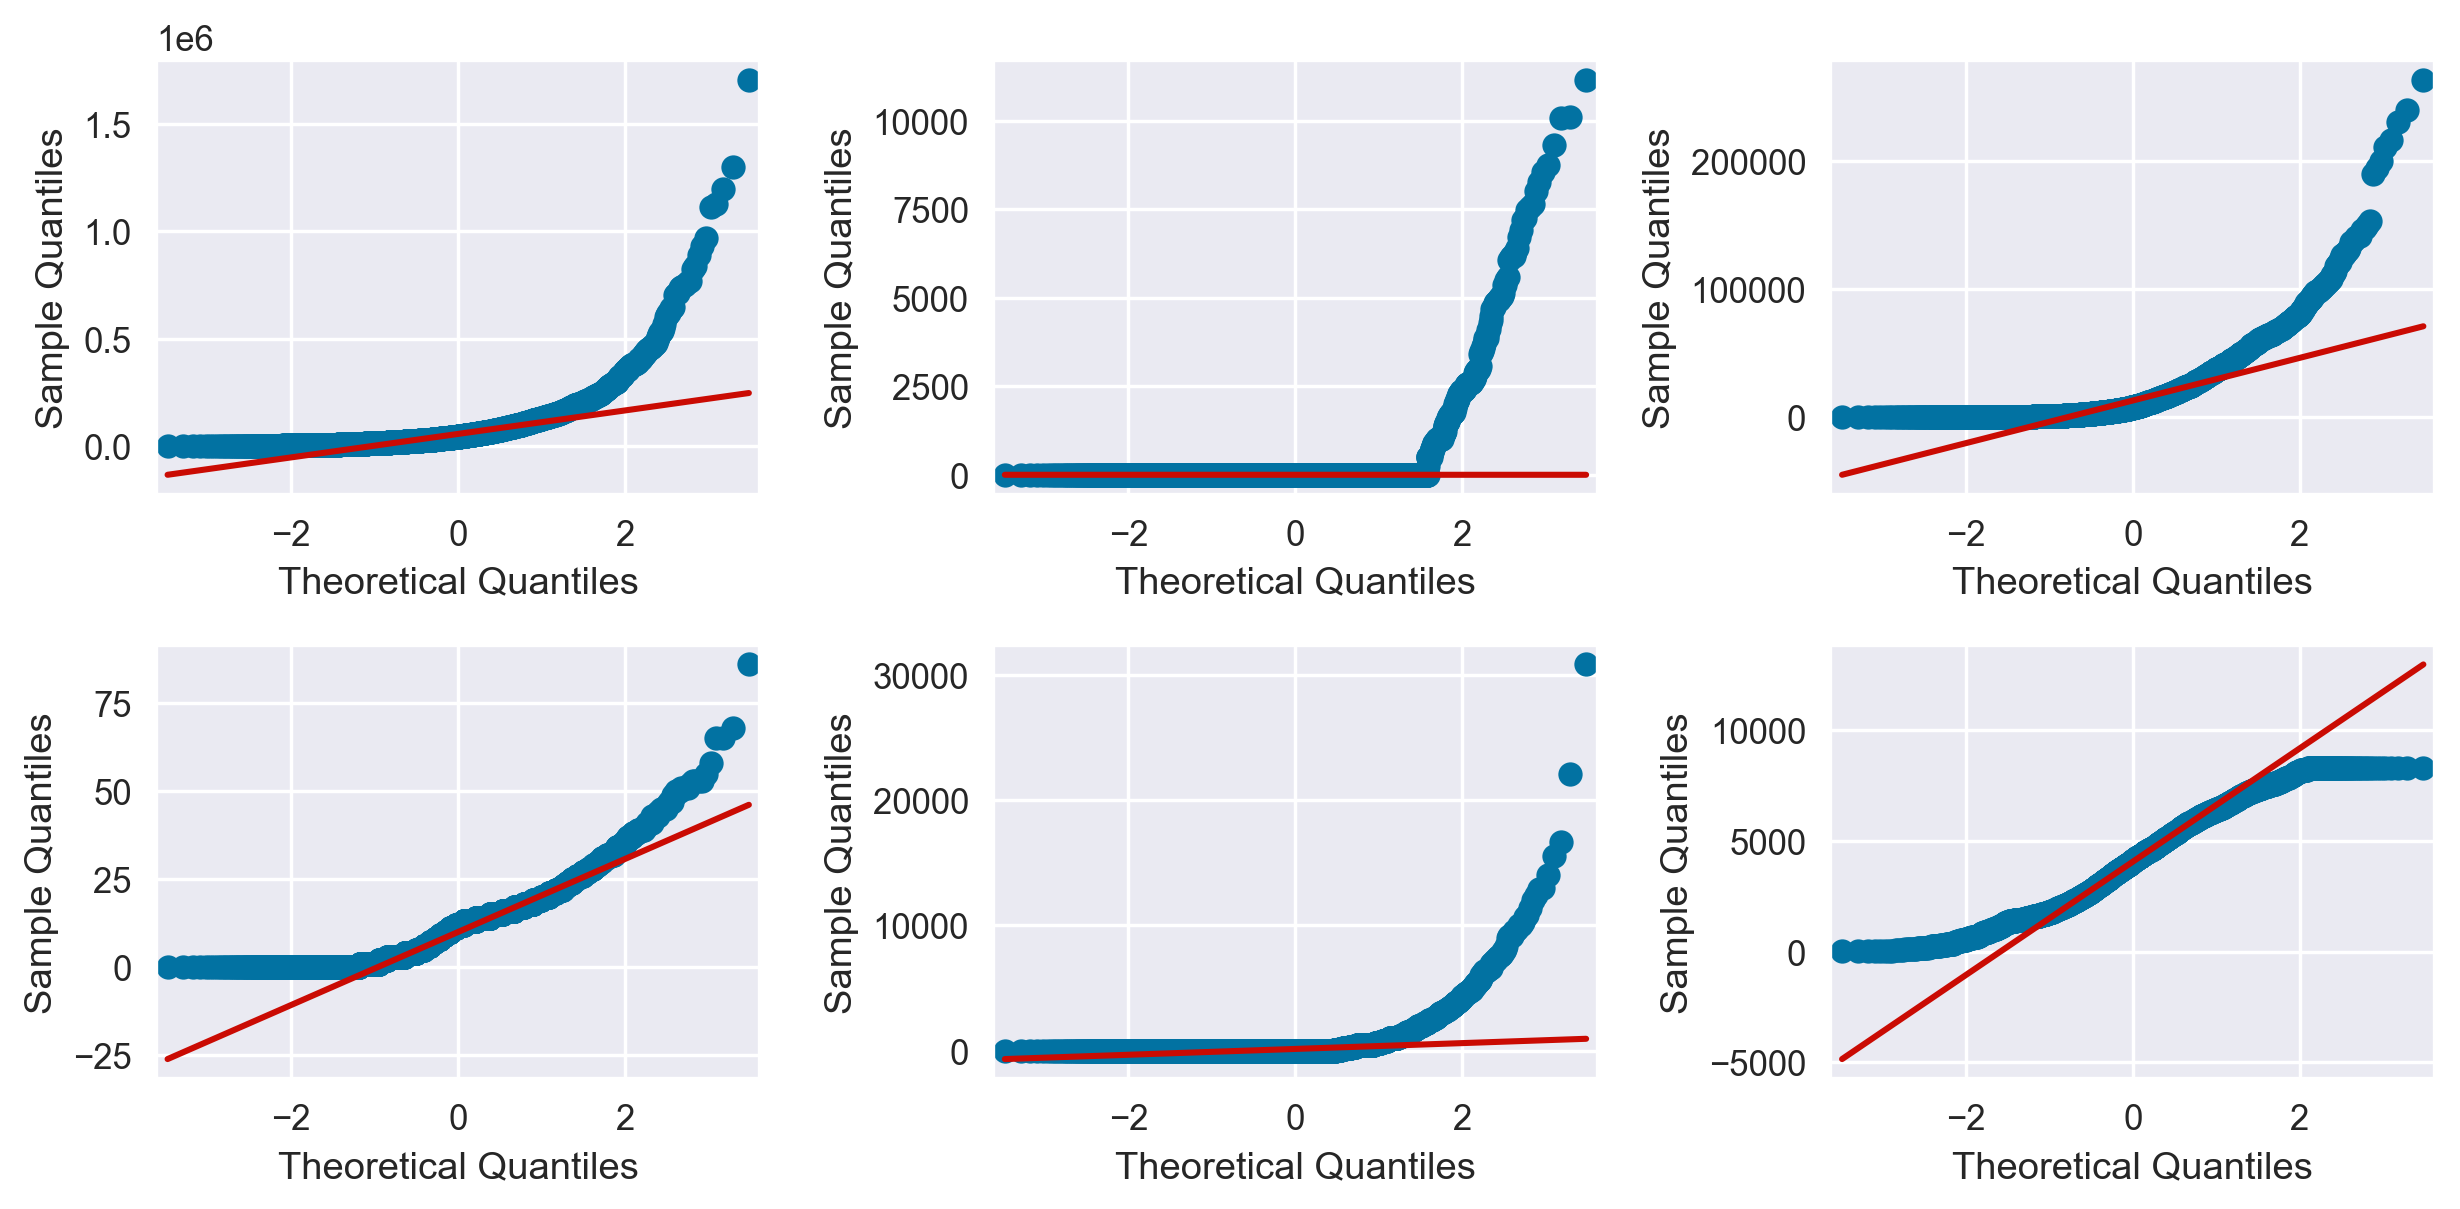

In [ ]:
fig, ax = plt.subplots(2,3)

sm.qqplot(ewa['Balance'], ax = ax[0,0], line = 'q')
sm.qqplot(ewa['Qual_miles'], ax = ax[0,1], line = 'q')
sm.qqplot(ewa['Bonus_miles'], ax = ax[0,2], line = 'q')
sm.qqplot(ewa['Bonus_trans'], ax = ax[1,0], line = 'q')
sm.qqplot(ewa['Flight_miles_12mo'], ax = ax[1,1], line = 'q')
sm.qqplot(ewa['Days_since_enroll'], ax = ax[1,2], line = 'q')

plt.tight_layout()

### Correlation Analysis

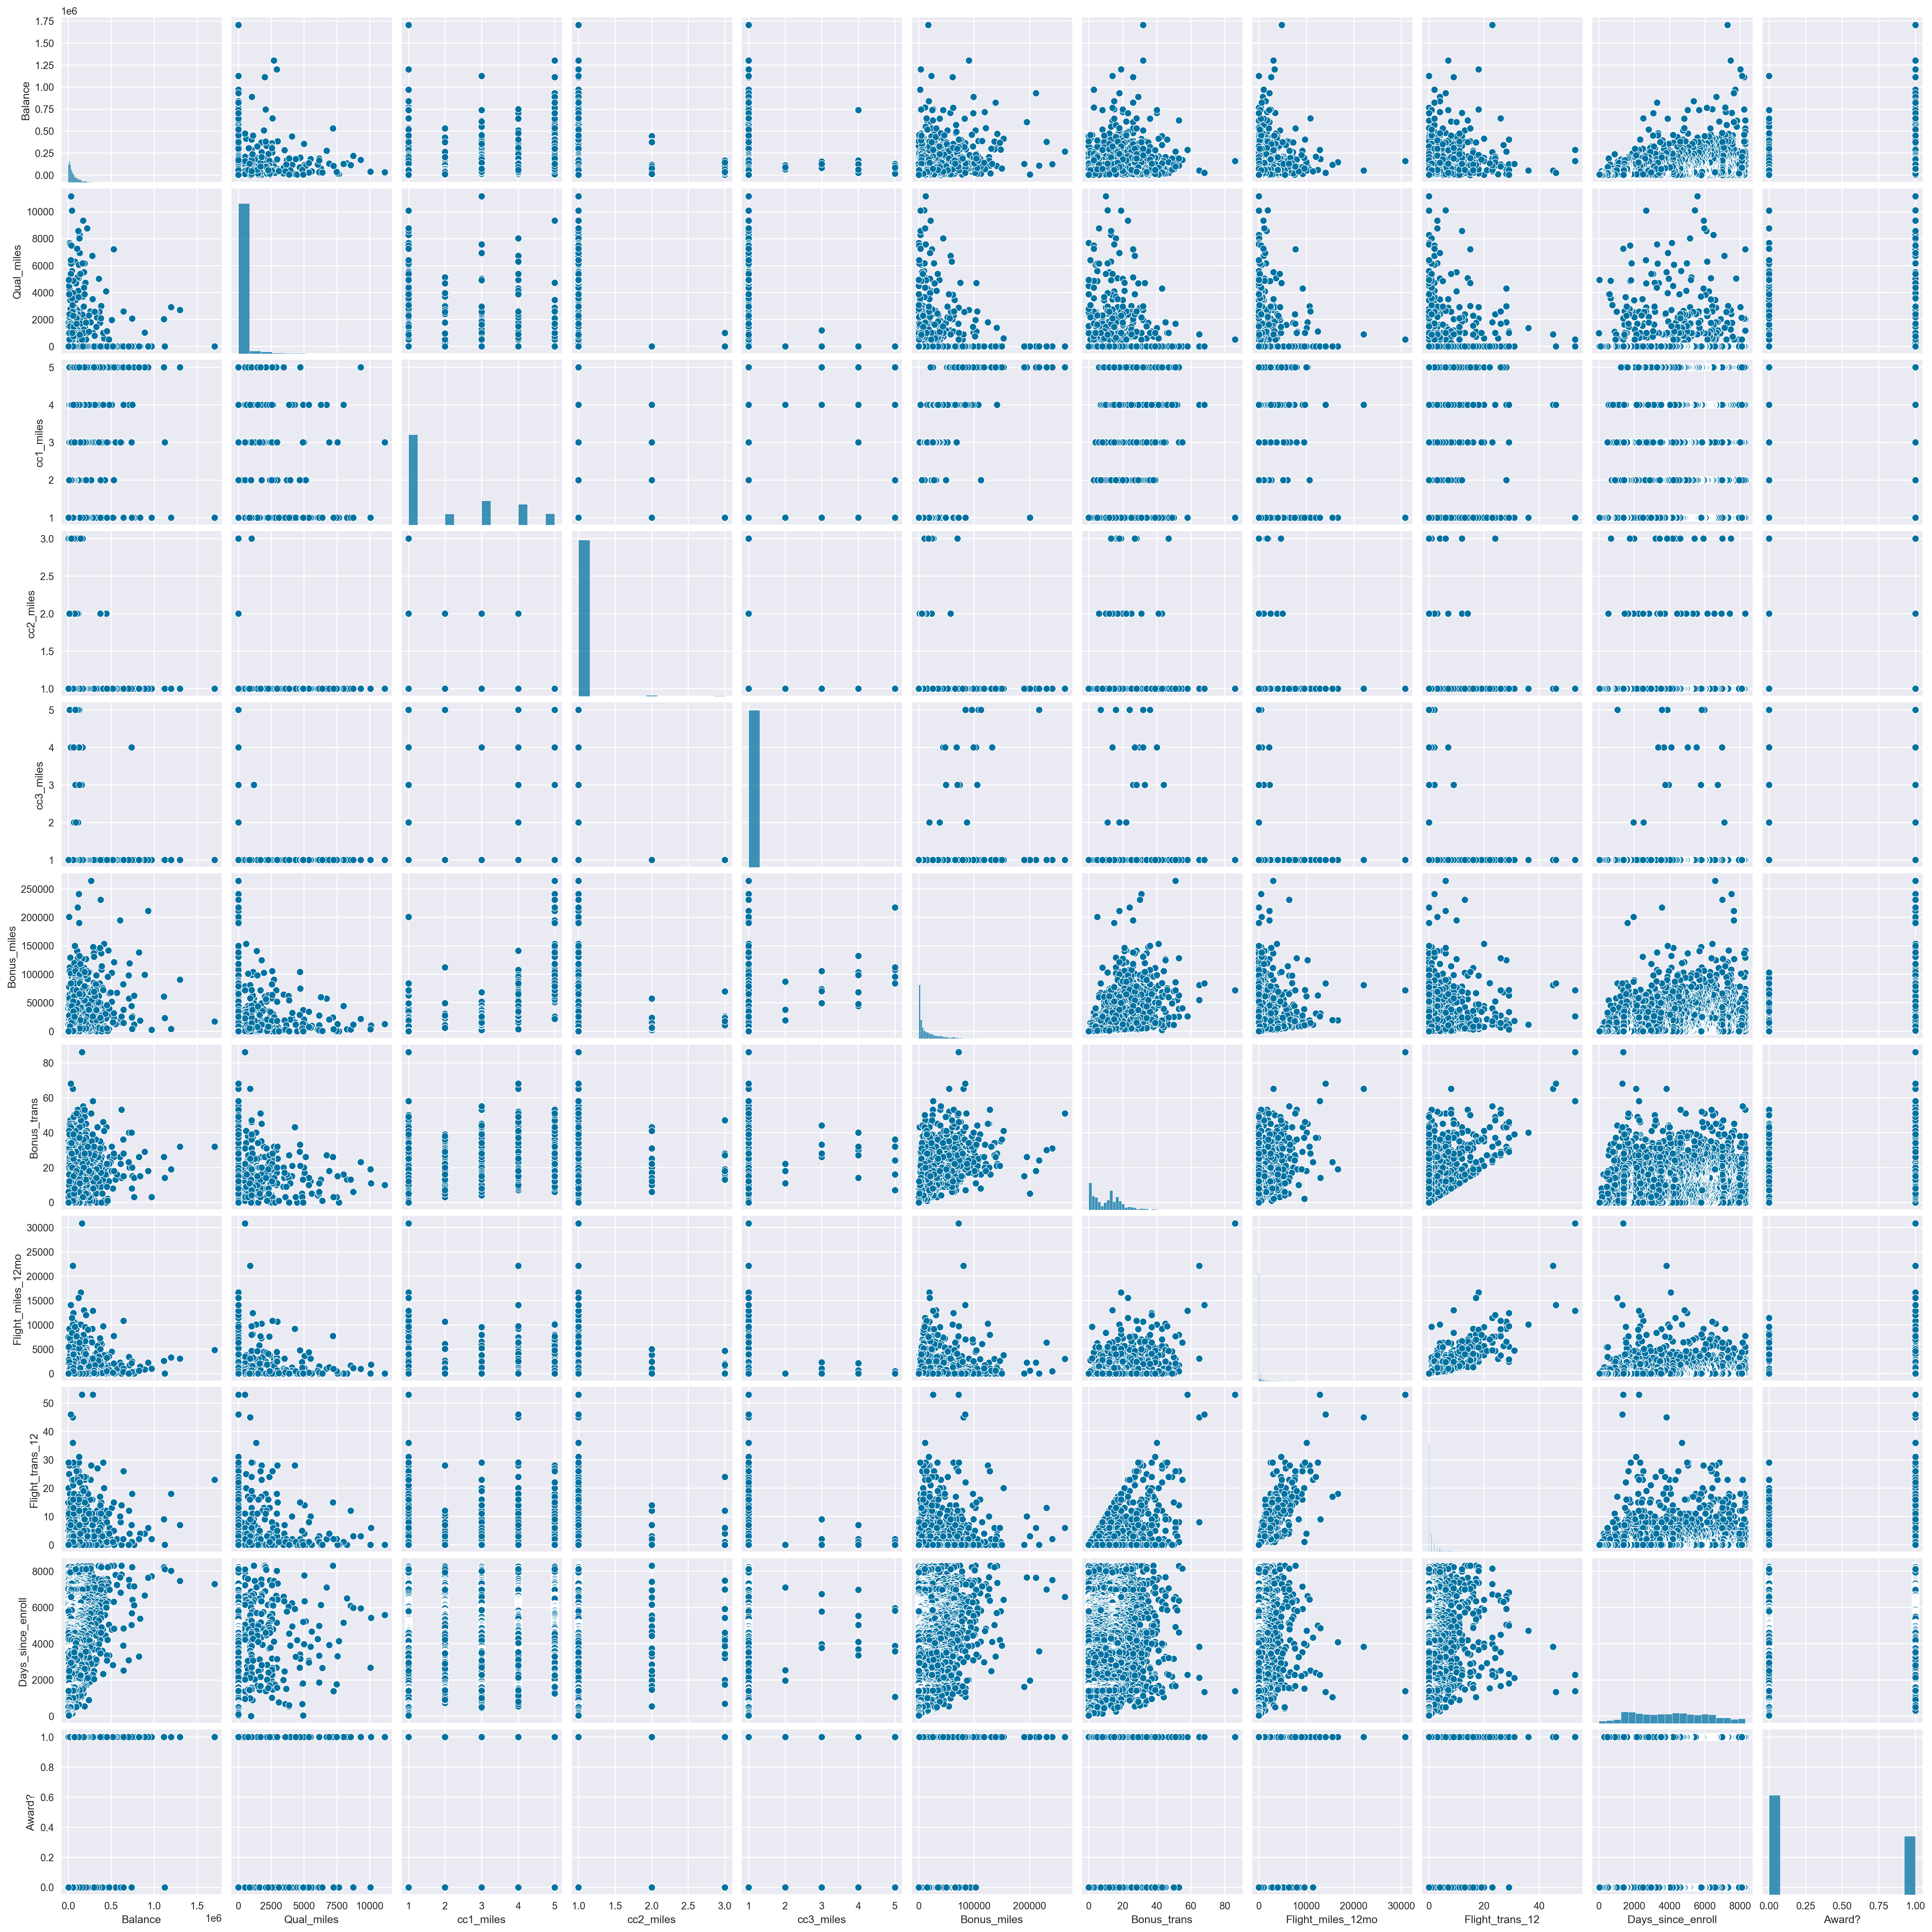

In [ ]:
sns.pairplot(data = ewa)

<AxesSubplot:>

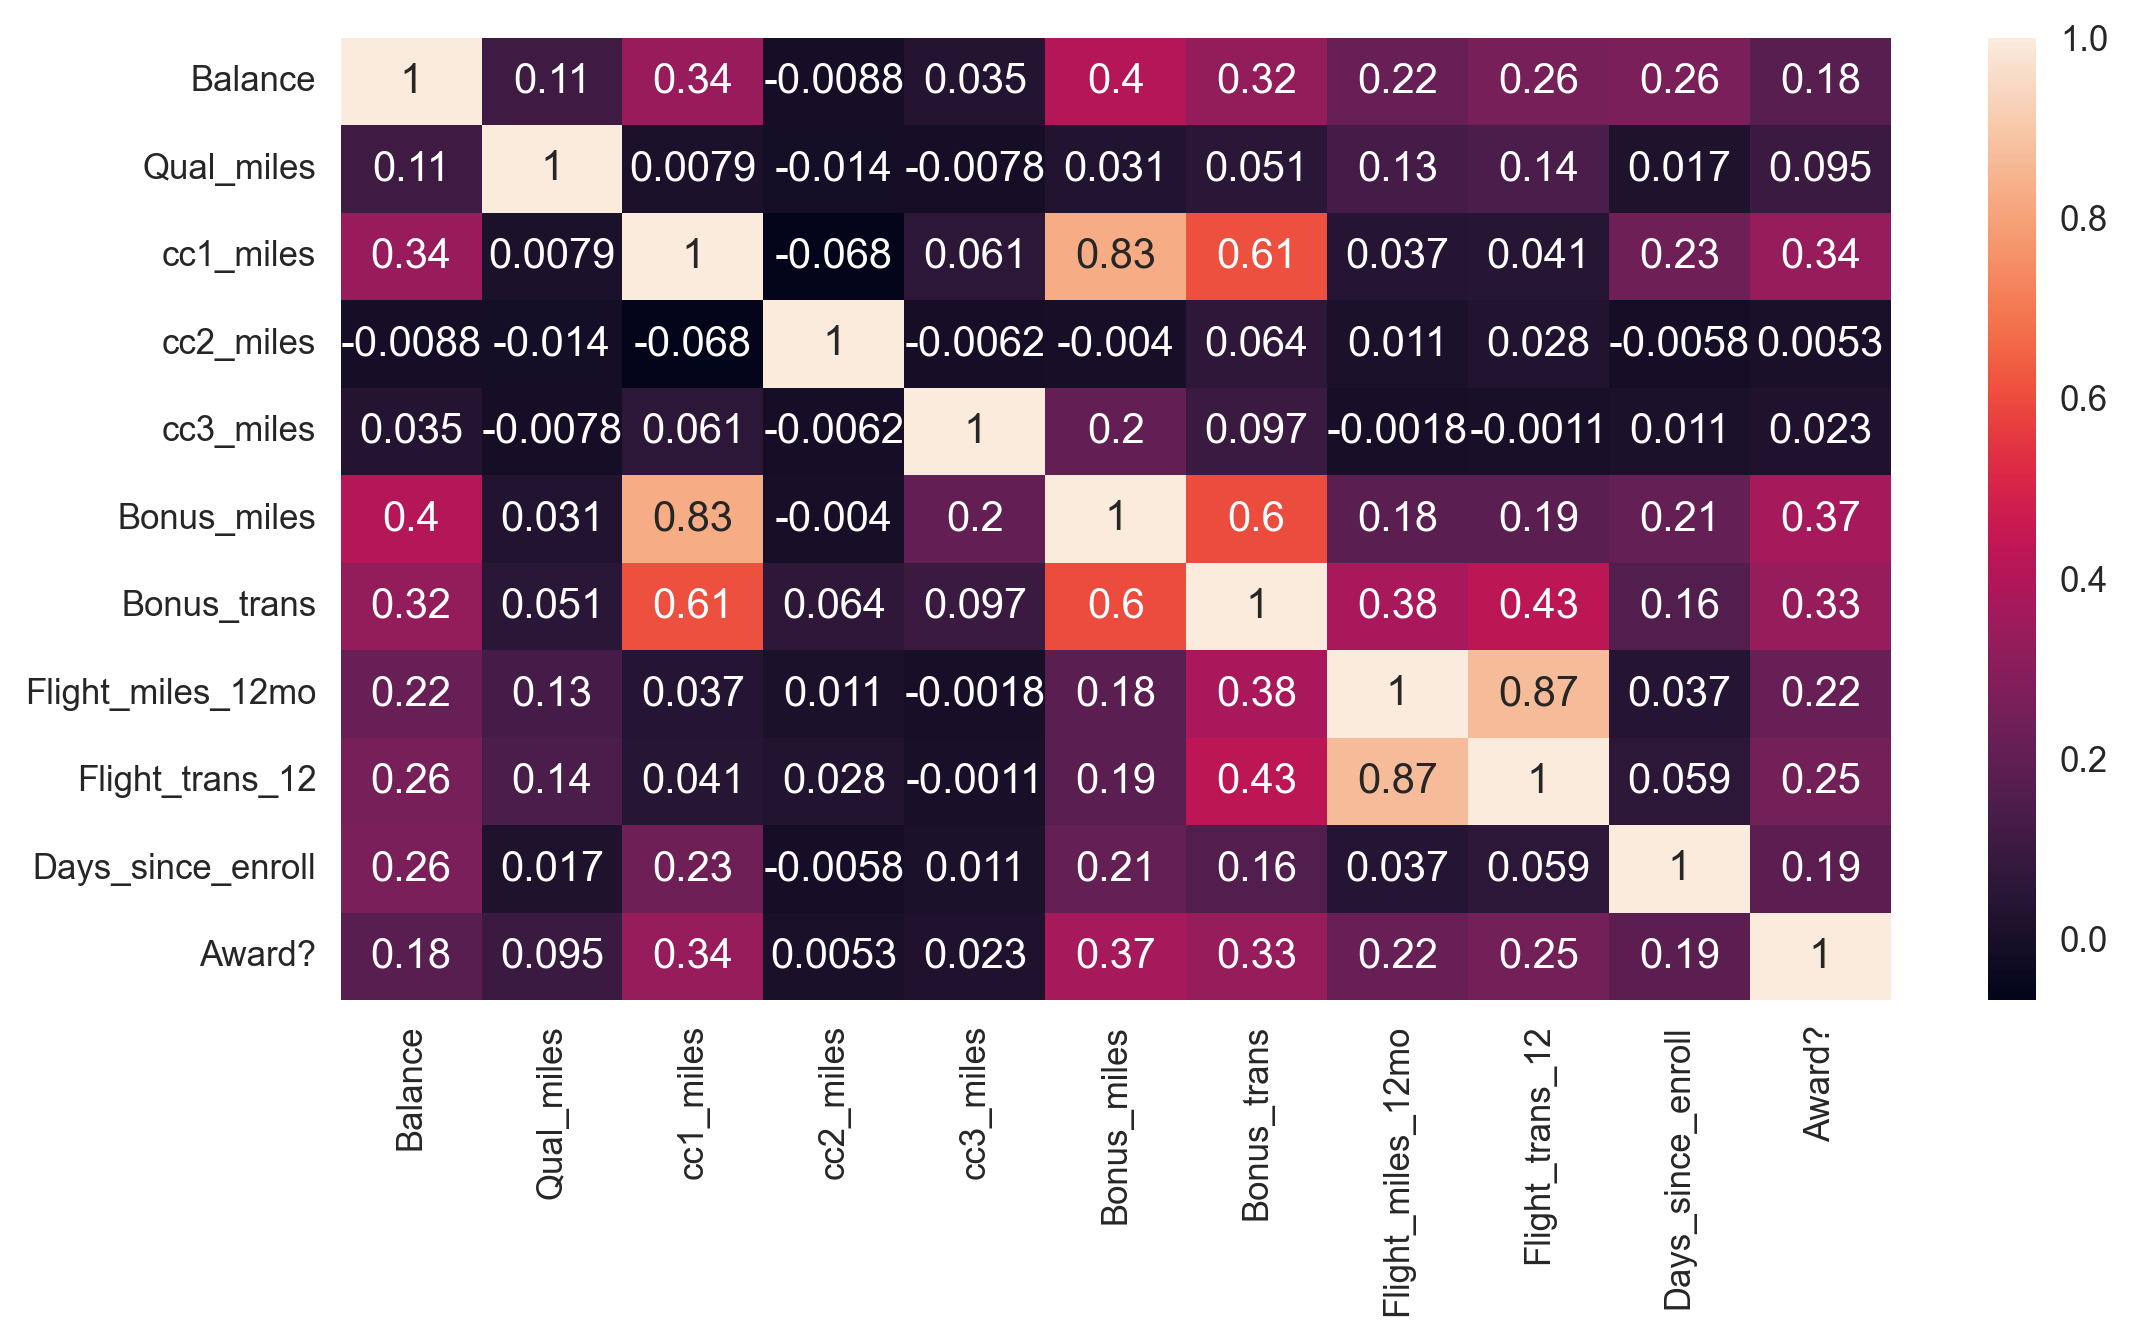

In [ ]:
sns.heatmap(ewa.corr(), annot=True)

### Outlier Detection

In [ ]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [ ]:
def replace_outlier_median(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, st[col].median(), inplace=True)
    st[col].mask(st[col] < lower, st[col].median(), inplace=True)

In [ ]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [ ]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Outlier Percentage (Before)

In [ ]:
outlier_percentage(ewa)

Balance : 6.653326663331666 %
Qual_miles : 5.652826413206603 %
cc1_miles : 0.0 %
cc2_miles : 1.0755377688844423 %
cc3_miles : 0.4502251125562781 %
Bonus_miles : 6.9784892446223115 %
Bonus_trans : 1.5757878939469734 %
Flight_miles_12mo : 14.232116058029016 %
Flight_trans_12 : 14.132066033016507 %
Days_since_enroll : 0.0 %
Award? : 0.0 %


#### Replacing Outlier In Flight Miles 12mo Column

In [ ]:
pe.box(ewa['Flight_miles_12mo'], orientation='h')


In [ ]:
replace_outlier_extream(ewa, 'Flight_miles_12mo')


In [ ]:
pe.box(ewa['Flight_miles_12mo'], orientation='h')


#### Replacing Outlier In Flight Trans 12 Column

In [ ]:
pe.box(ewa['Flight_trans_12'], orientation='h')


In [ ]:
replace_outlier_extream(ewa, 'Flight_trans_12')


In [ ]:
pe.box(ewa['Flight_trans_12'], orientation='h')


#### Outlier Percentage (After)

In [ ]:
outlier_percentage(ewa)

Balance : 6.653326663331666 %
Qual_miles : 5.652826413206603 %
cc1_miles : 0.0 %
cc2_miles : 1.0755377688844423 %
cc3_miles : 0.4502251125562781 %
Bonus_miles : 6.9784892446223115 %
Bonus_trans : 1.5757878939469734 %
Flight_miles_12mo : 0.0 %
Flight_trans_12 : 0.0 %
Days_since_enroll : 0.0 %
Award? : 0.0 %


- we tryed removeing/replacing the outlier on Balance and Bonus Miles column but it just sifted the extreme, so we will be retaining the outlier.
- as there aren't several value in Qual_miles, so we will be retaining the outlier.

## Performing Feature Scaling

In [ ]:
x = ewa.drop(columns=['cc1_miles','cc2_miles','cc3_miles','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'])

In [ ]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

scaled_x.head()

Balance  Qual_miles  Bonus_miles  Bonus_trans
0 -0.451294   -0.186323    -0.702920    -1.104430
1 -0.539605   -0.186323    -0.701223    -1.000286
2 -0.320192   -0.186323    -0.539397    -0.791997
3 -0.583944   -0.186323    -0.689421    -1.104430
4  0.239483   -0.186323     1.082876     1.499179

## Preparing Model From The Dataset

### Creating Model With Hierarchical Clustering

#### Ploting Dendrogram

##### Ploting Dendrogram With All Method

In [ ]:
def plot_all_dendrogram(scaled_x):
    for methods in ['single','complete','average','weighted','centroid','median','ward']:
        plt.figure(figsize =(14,6))
        dict = {'fontsize':16,'fontweight' :14, 'color' : 'Black'}
        plt.title('Plotting Dendrogram with Method {}'.format(methods),fontdict = dict)
        Dendrogram1 = hierarchy.dendrogram(hierarchy.linkage(scaled_x, method = methods,optimal_ordering=False))

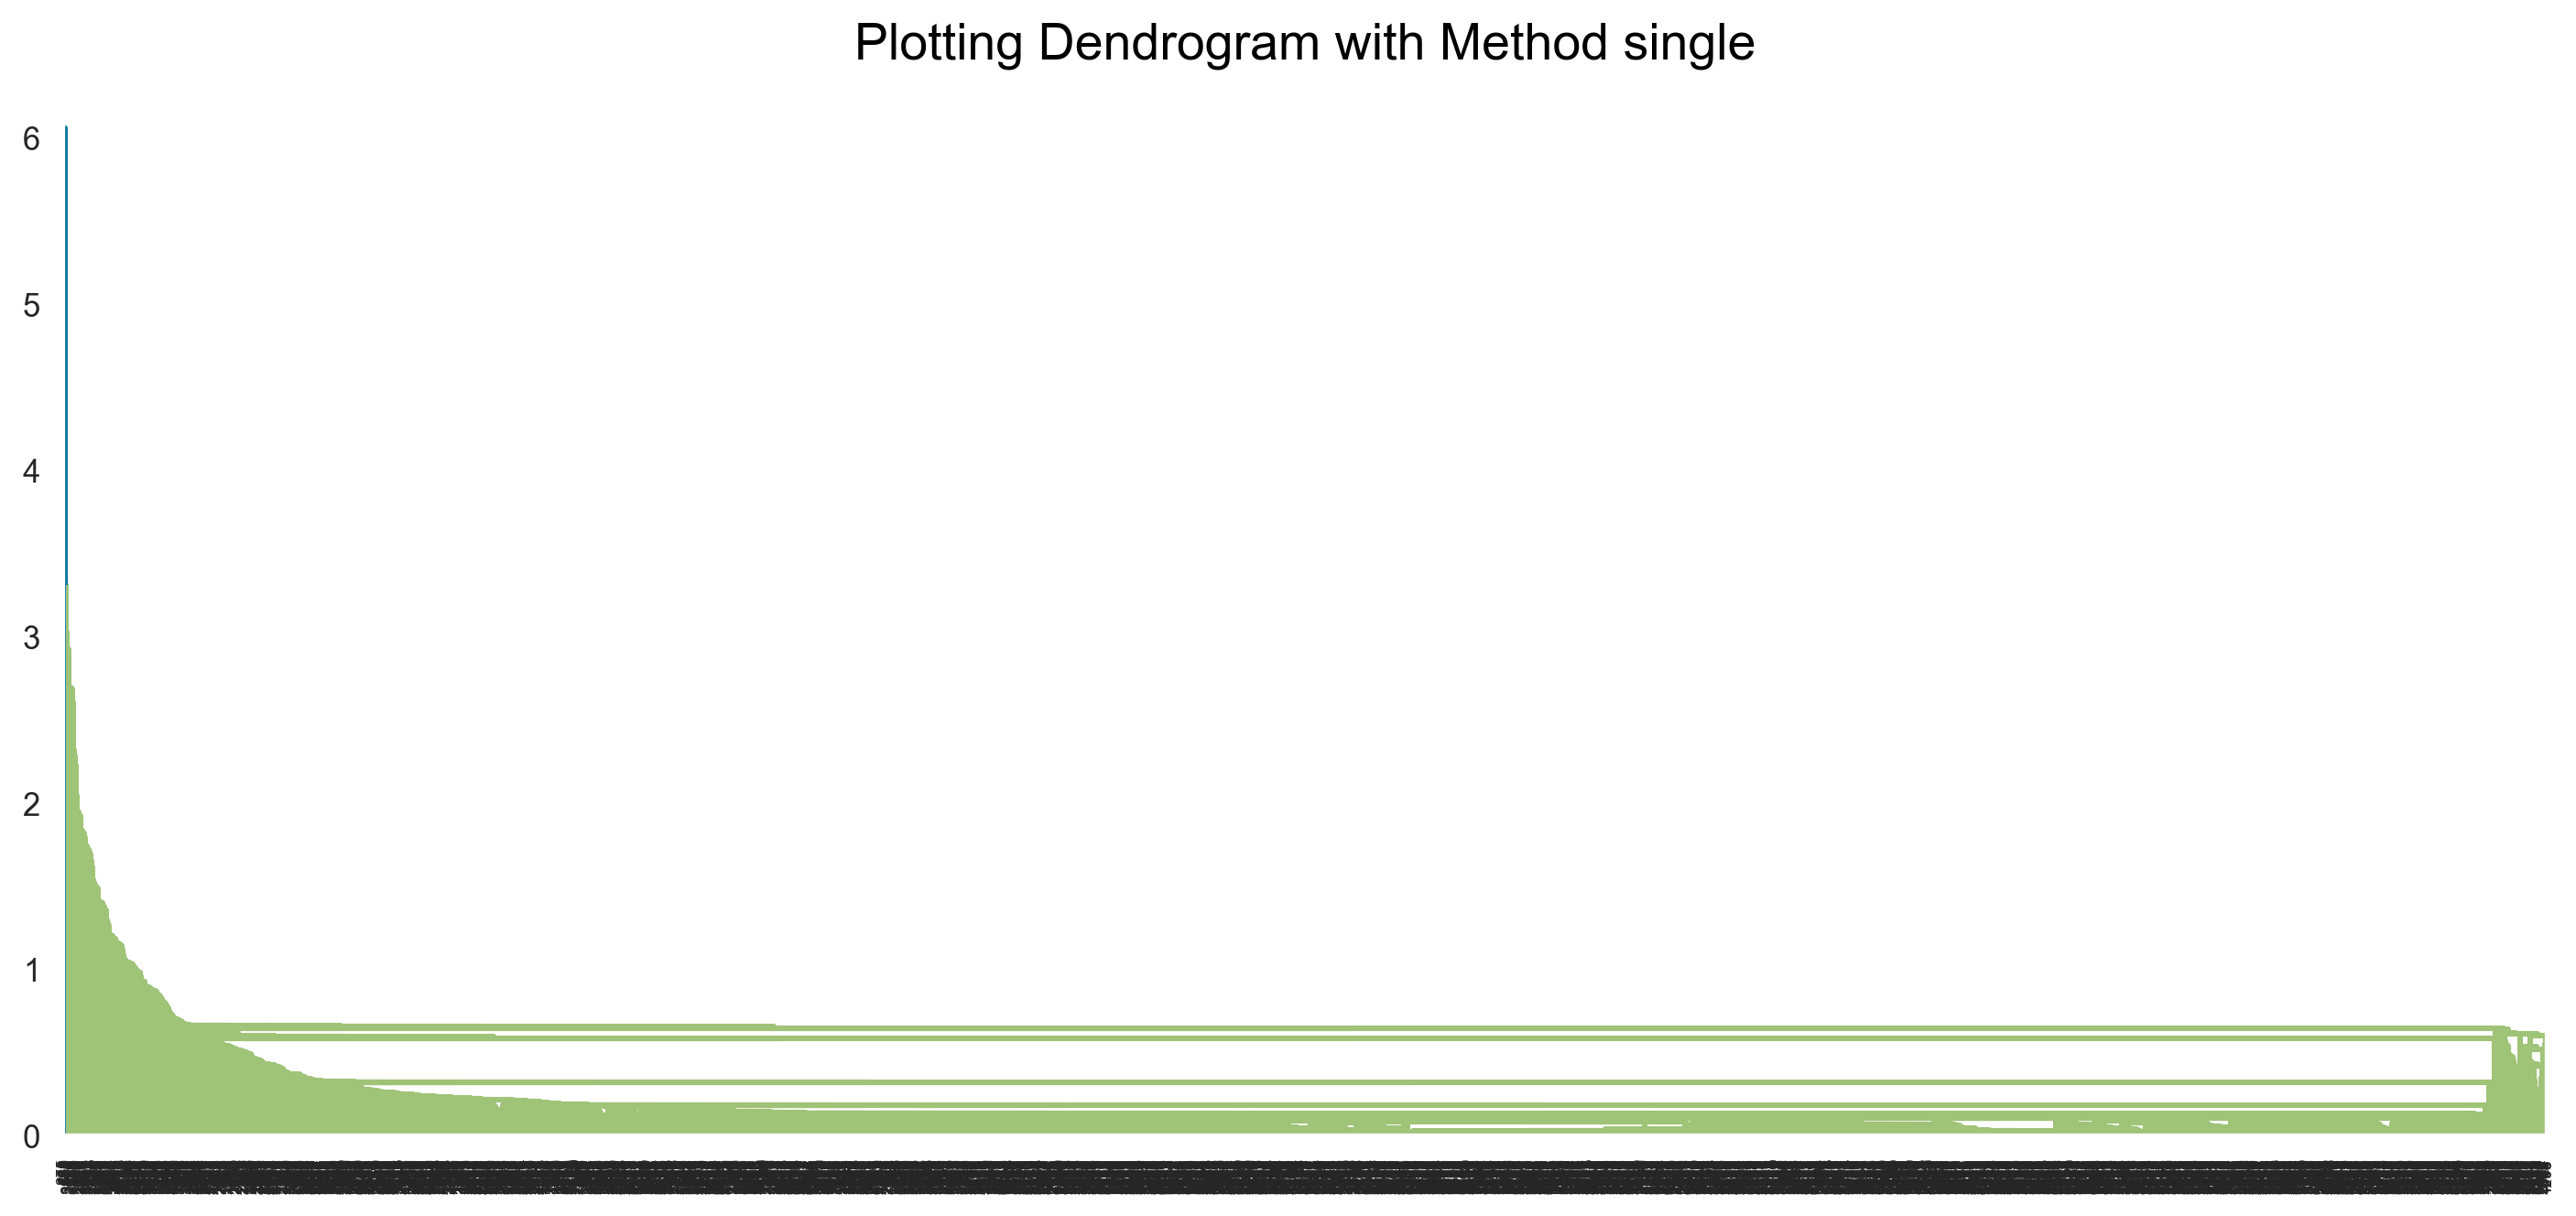

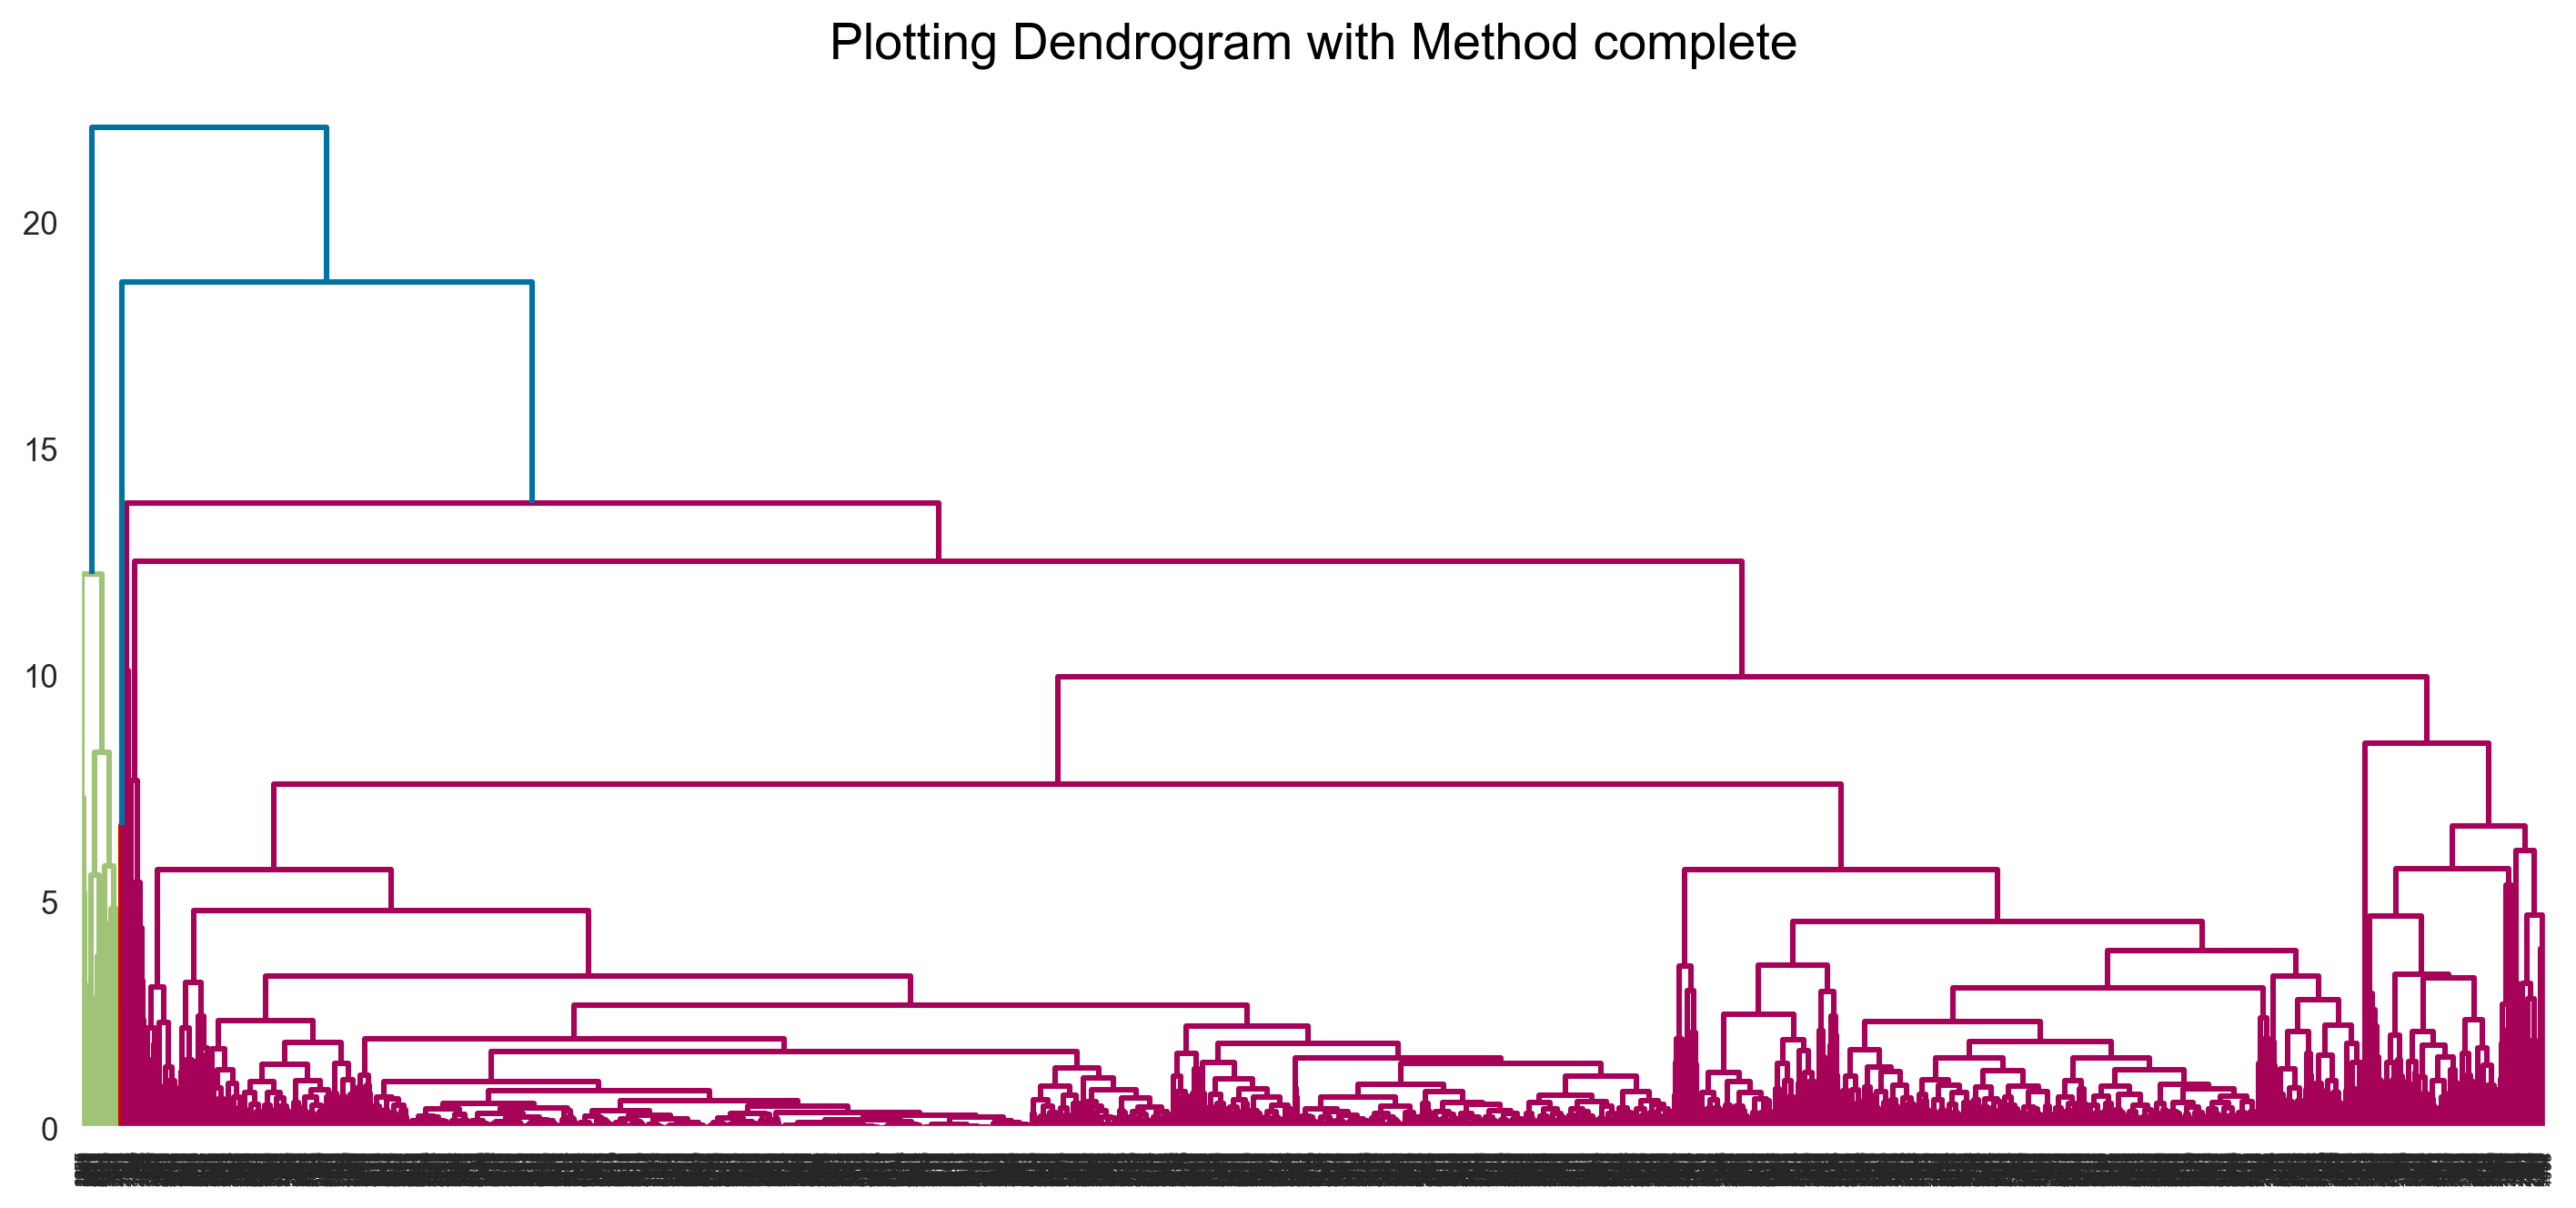

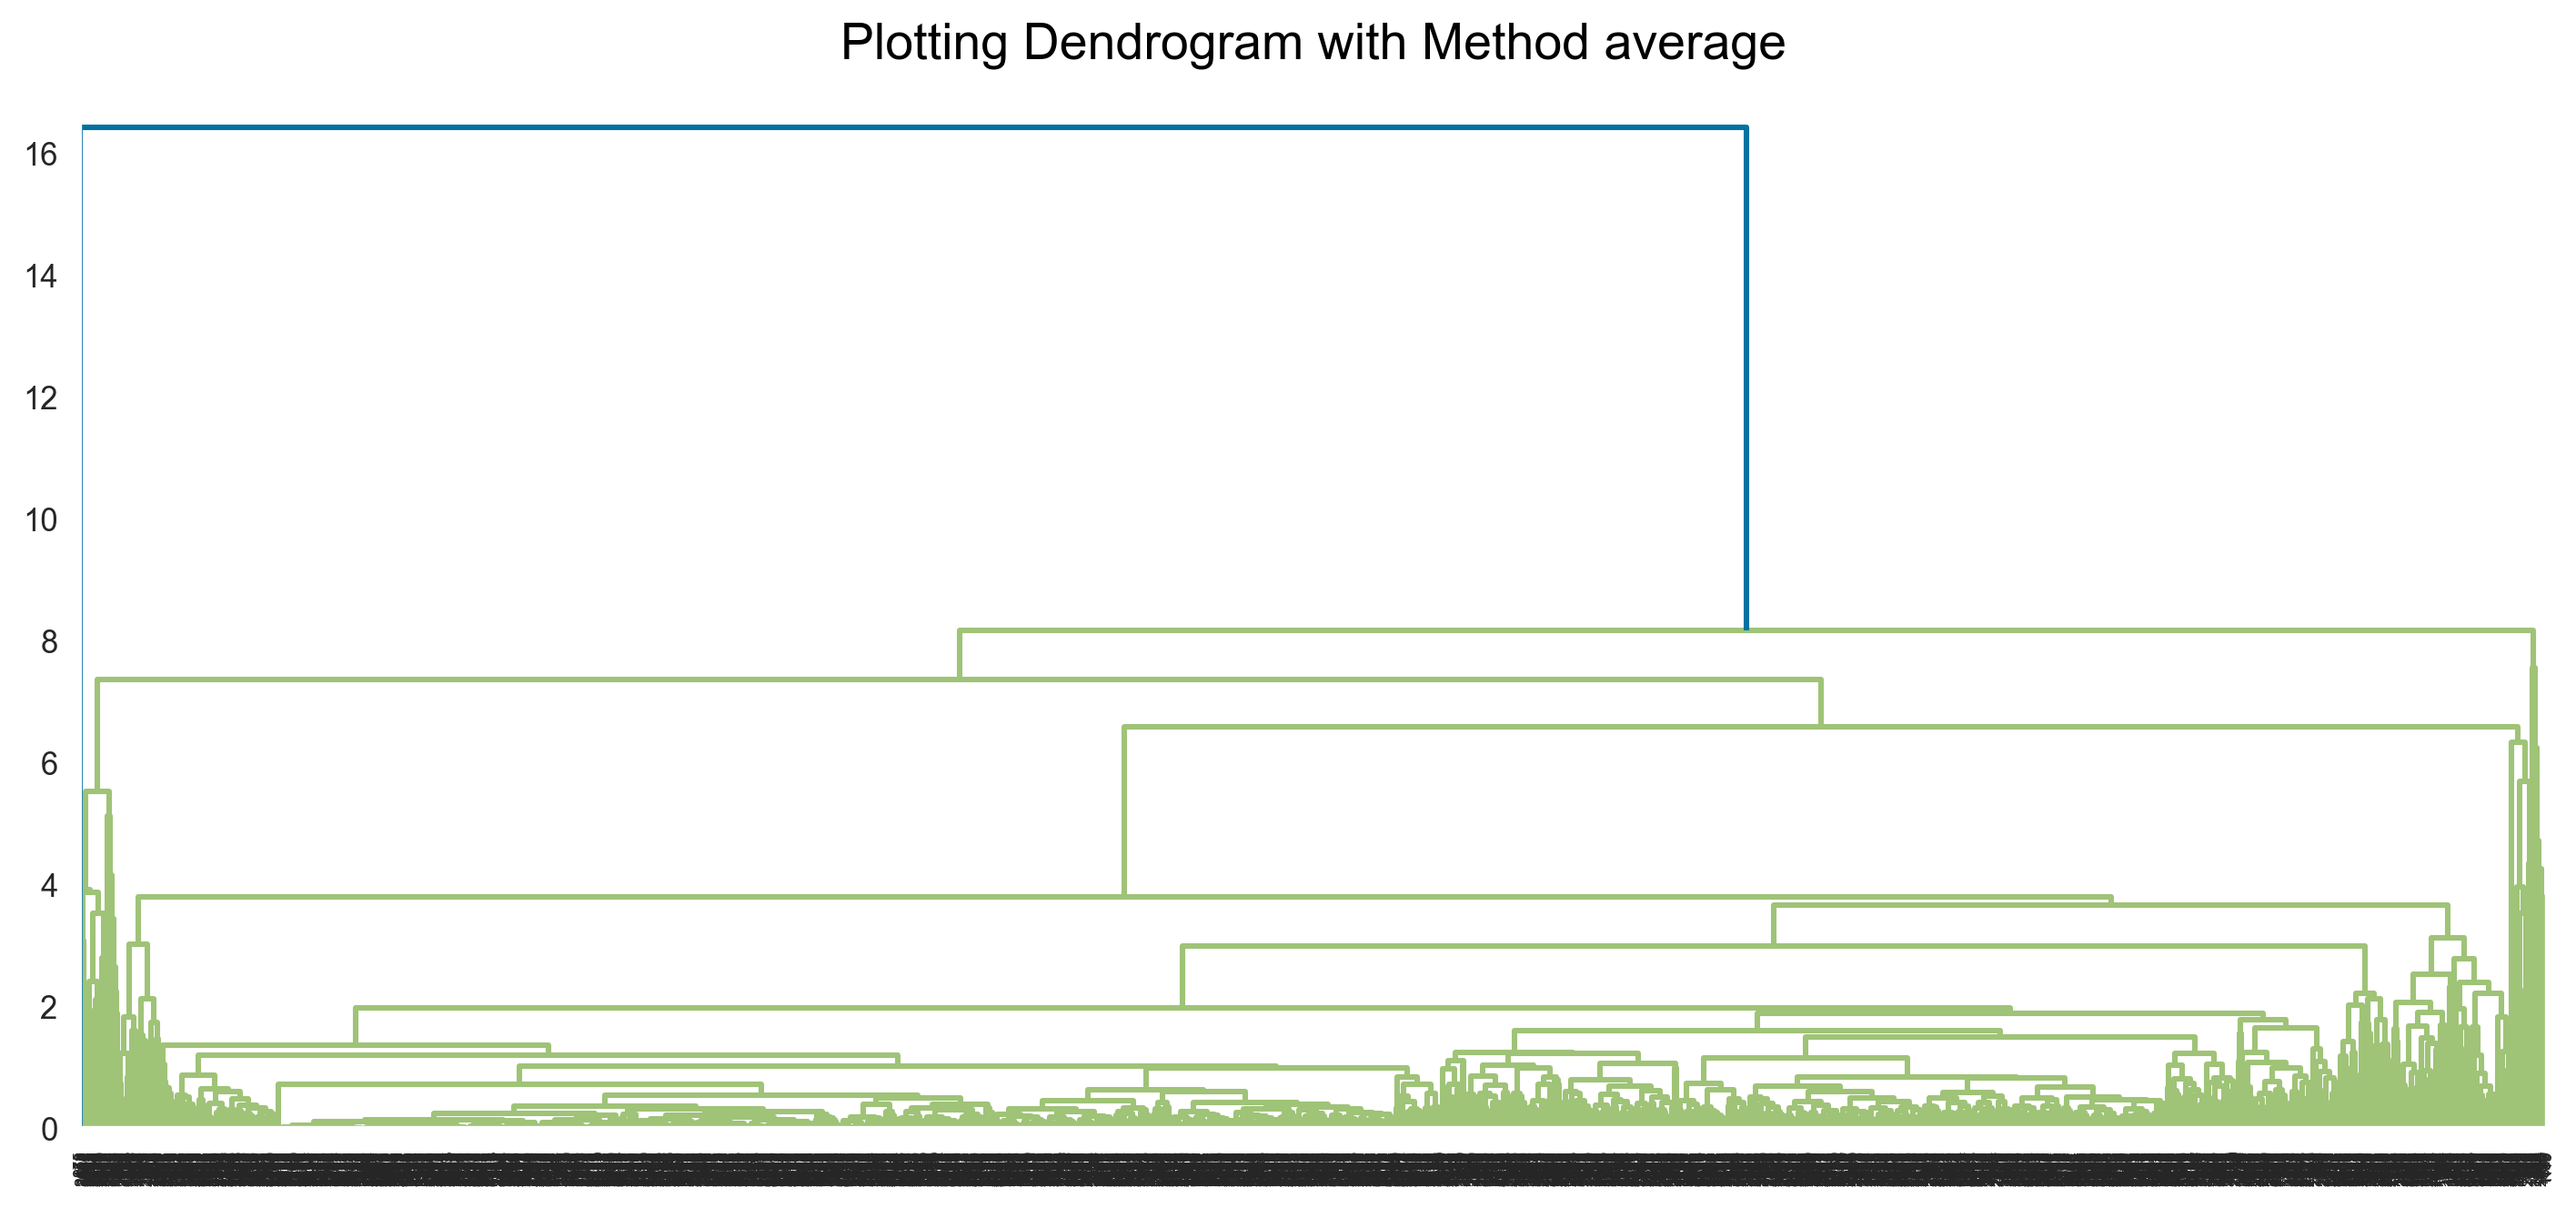

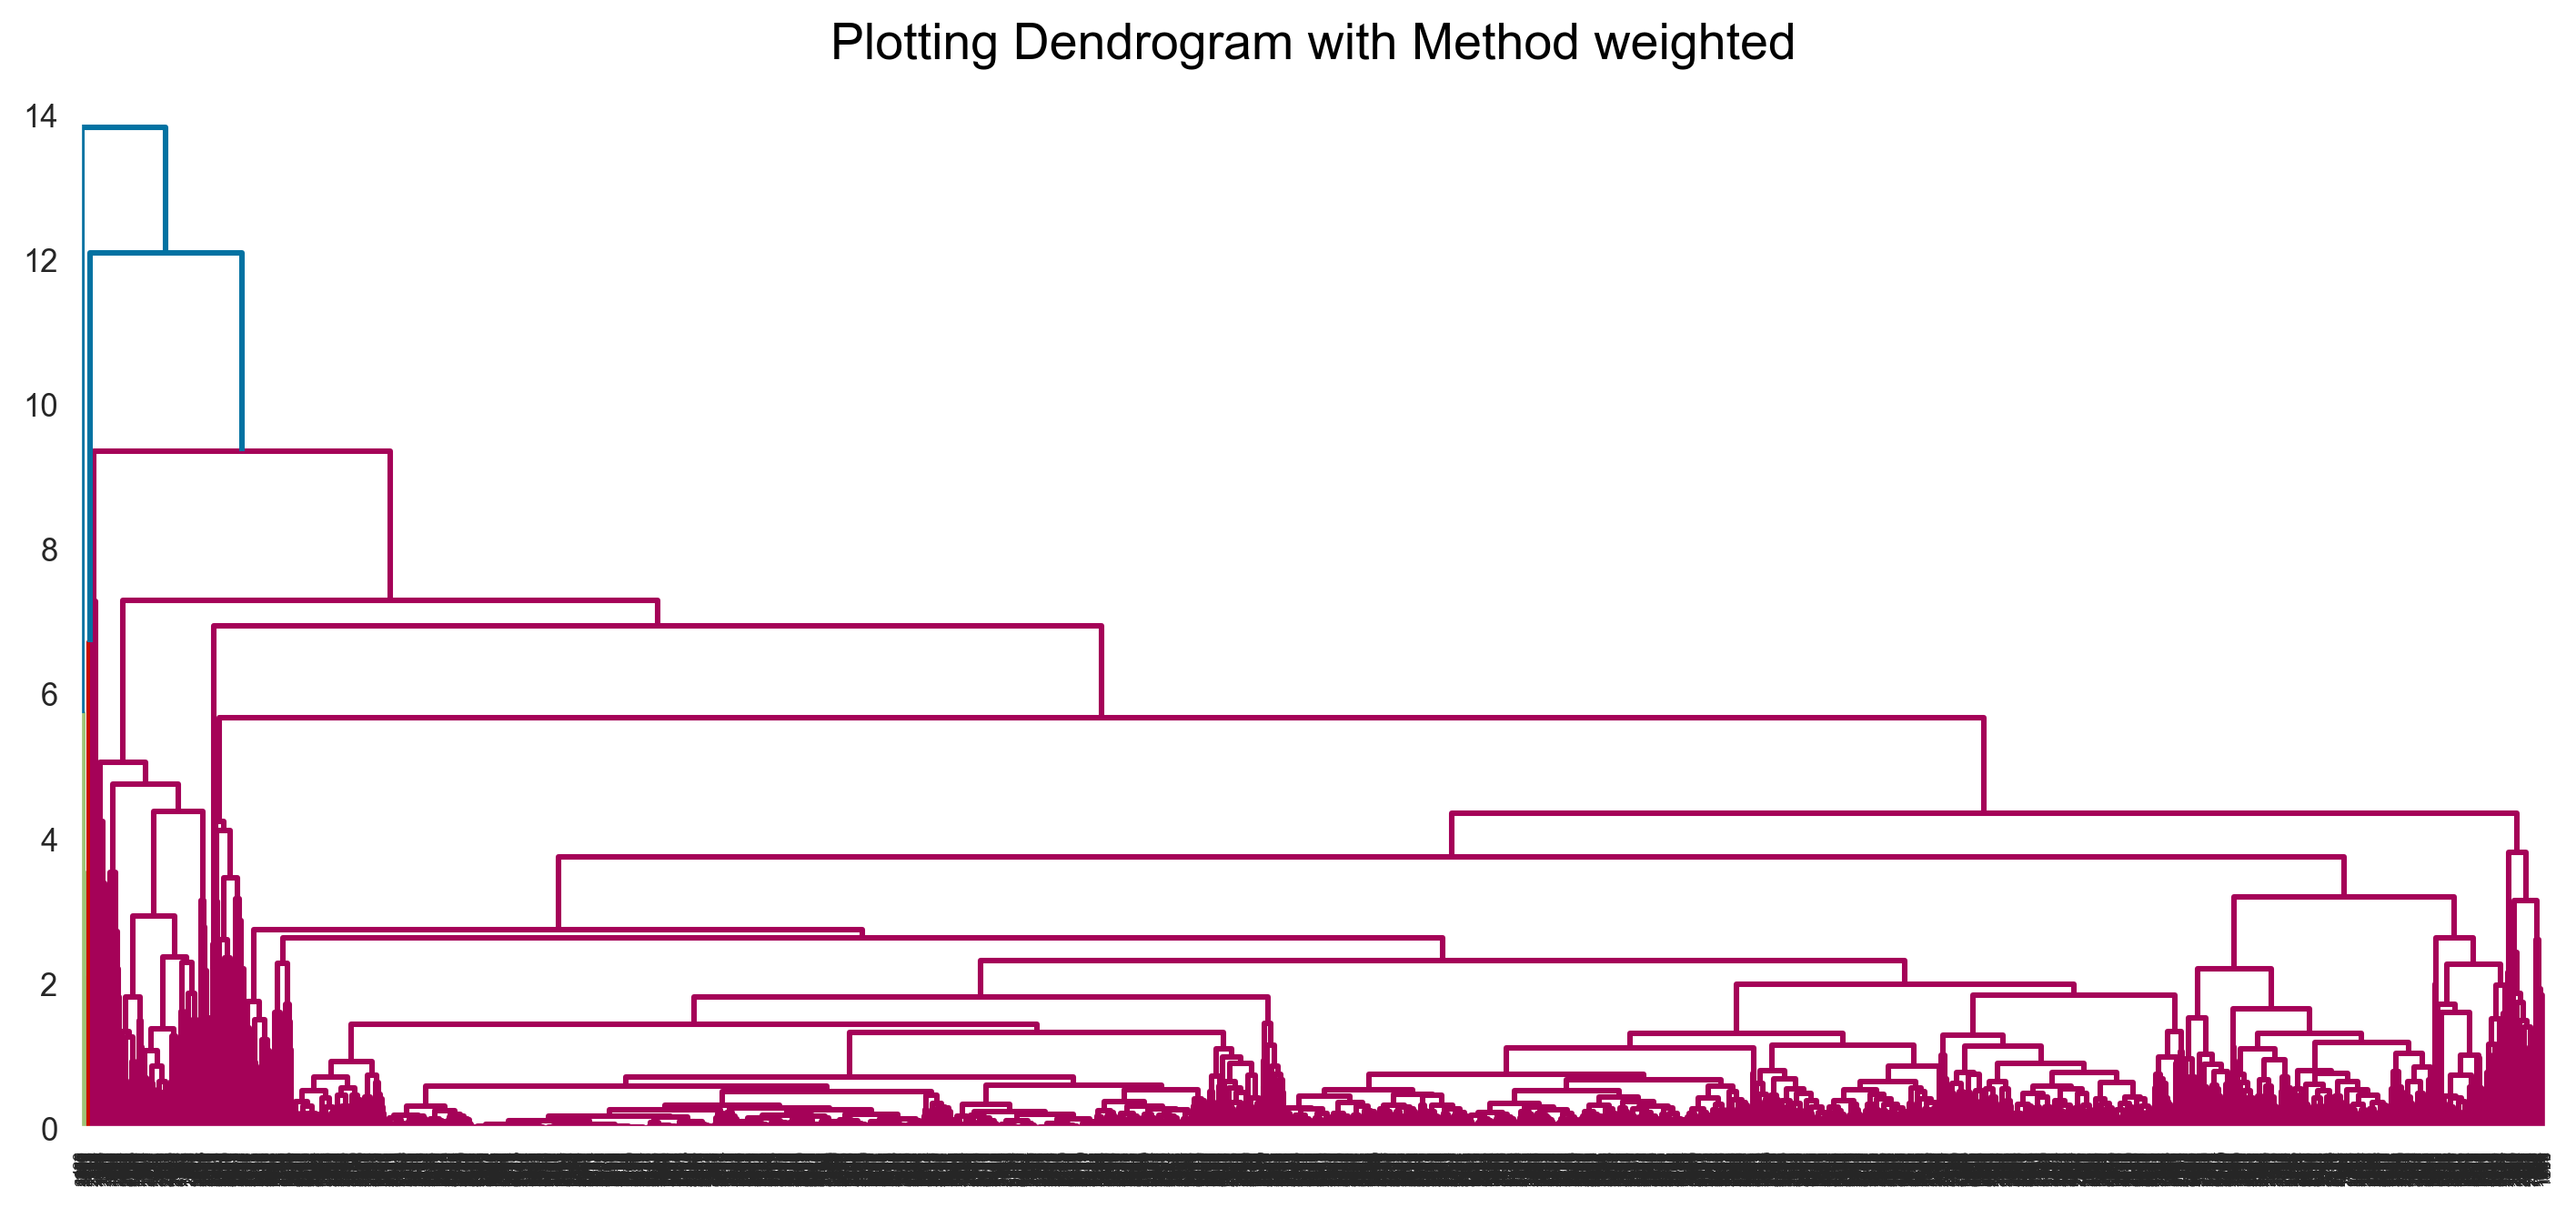

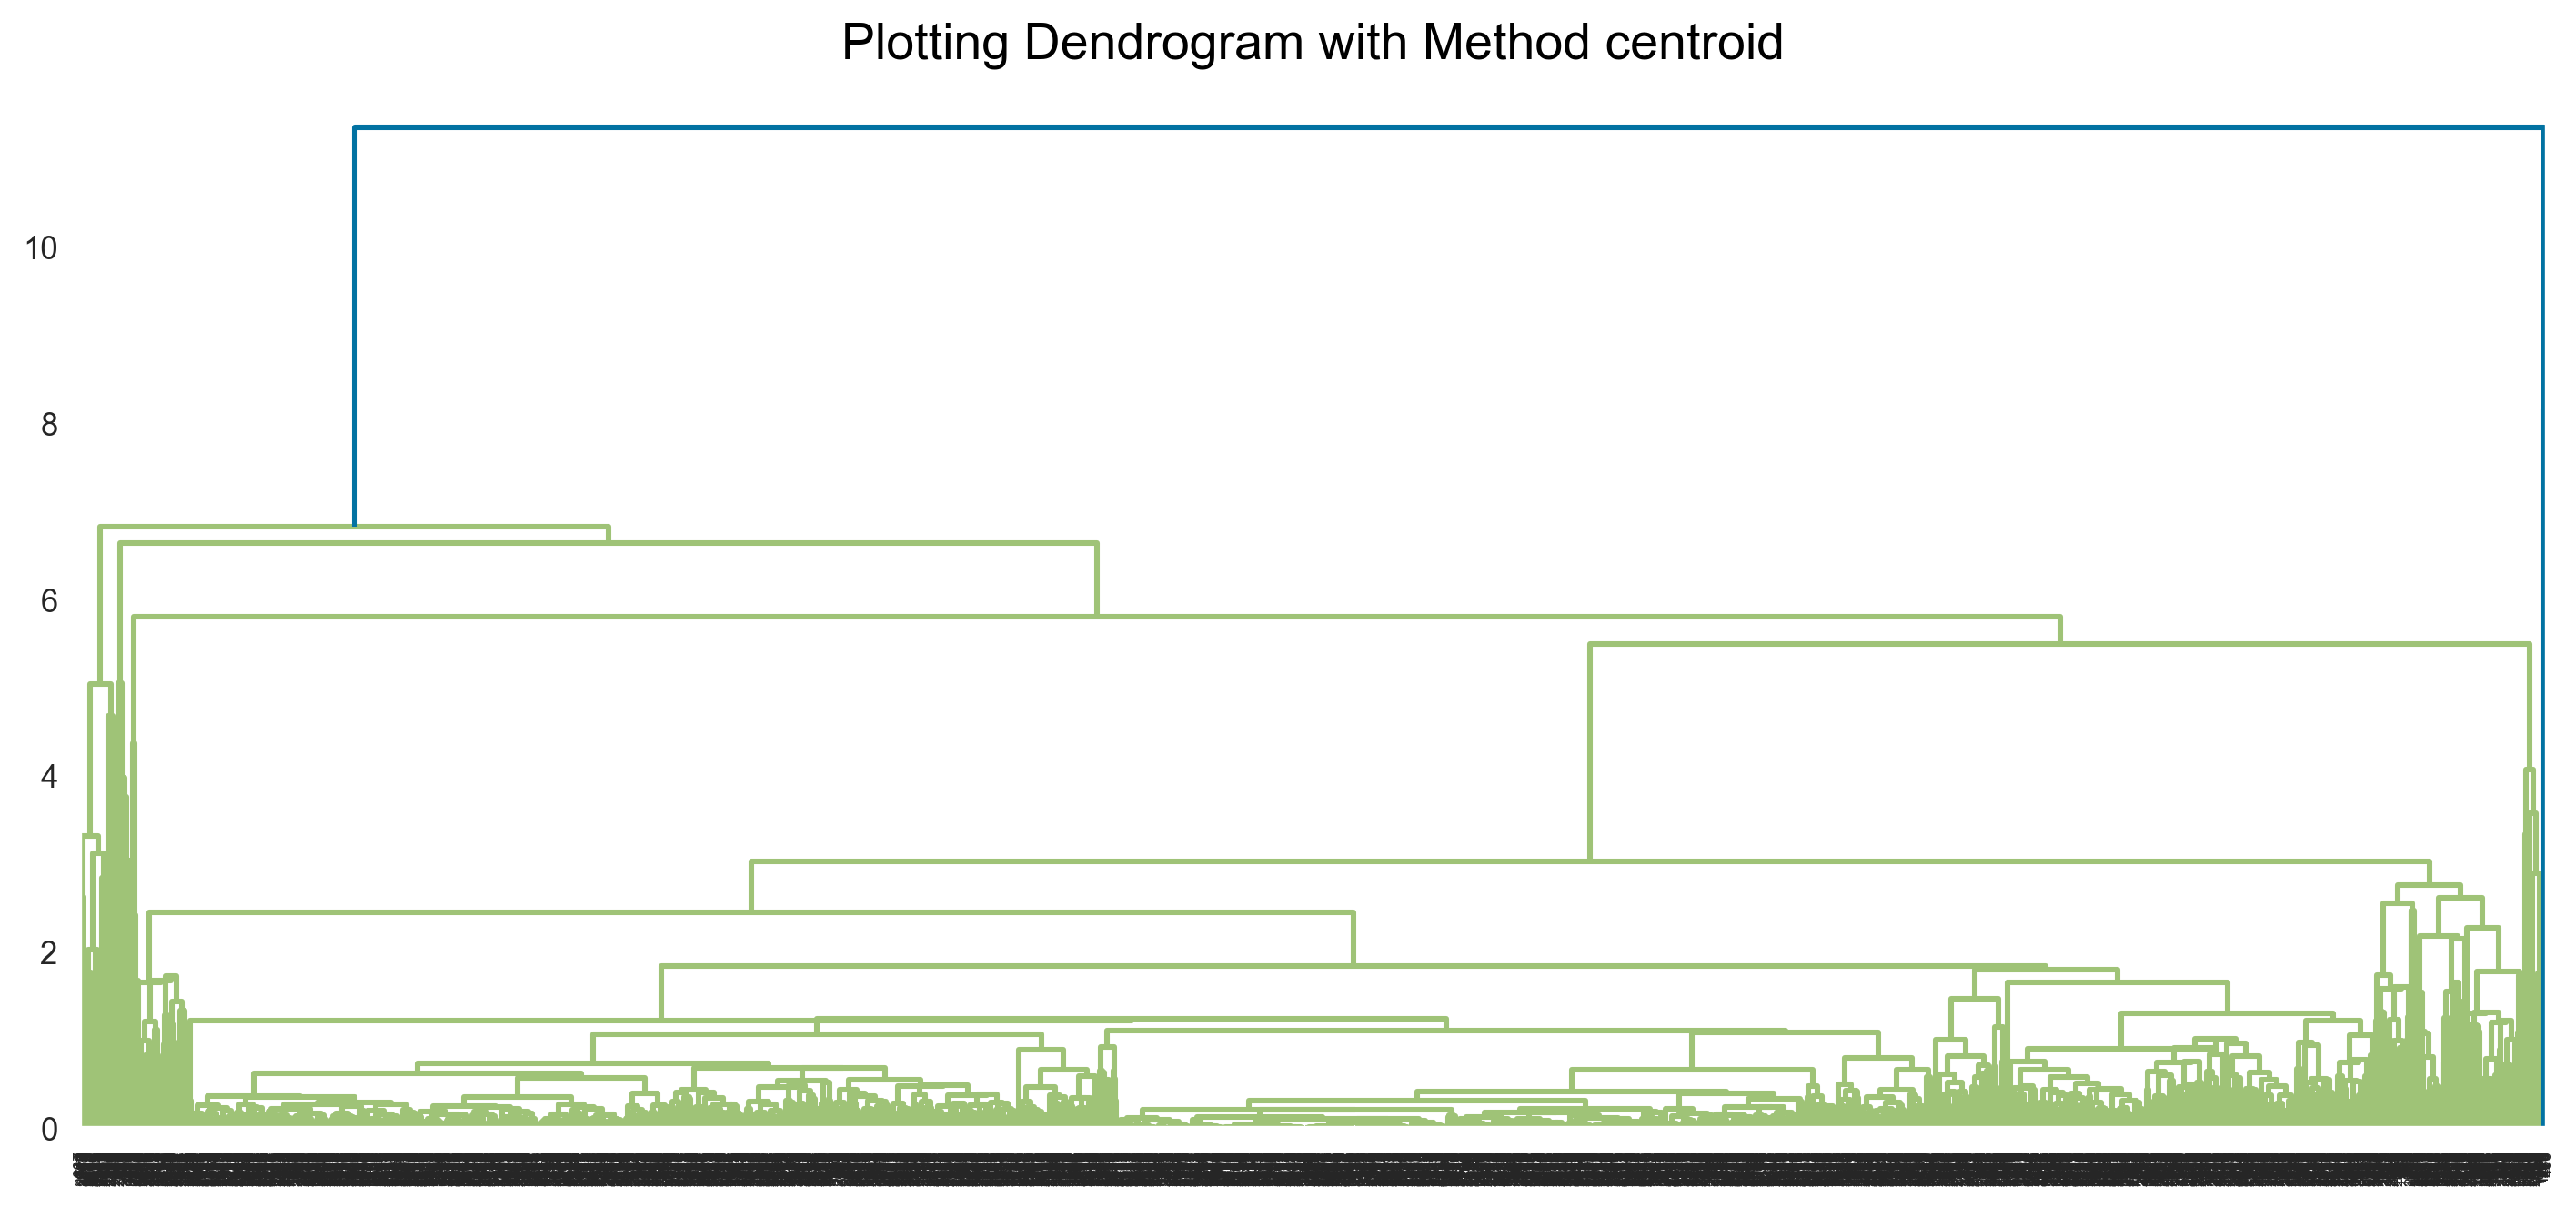

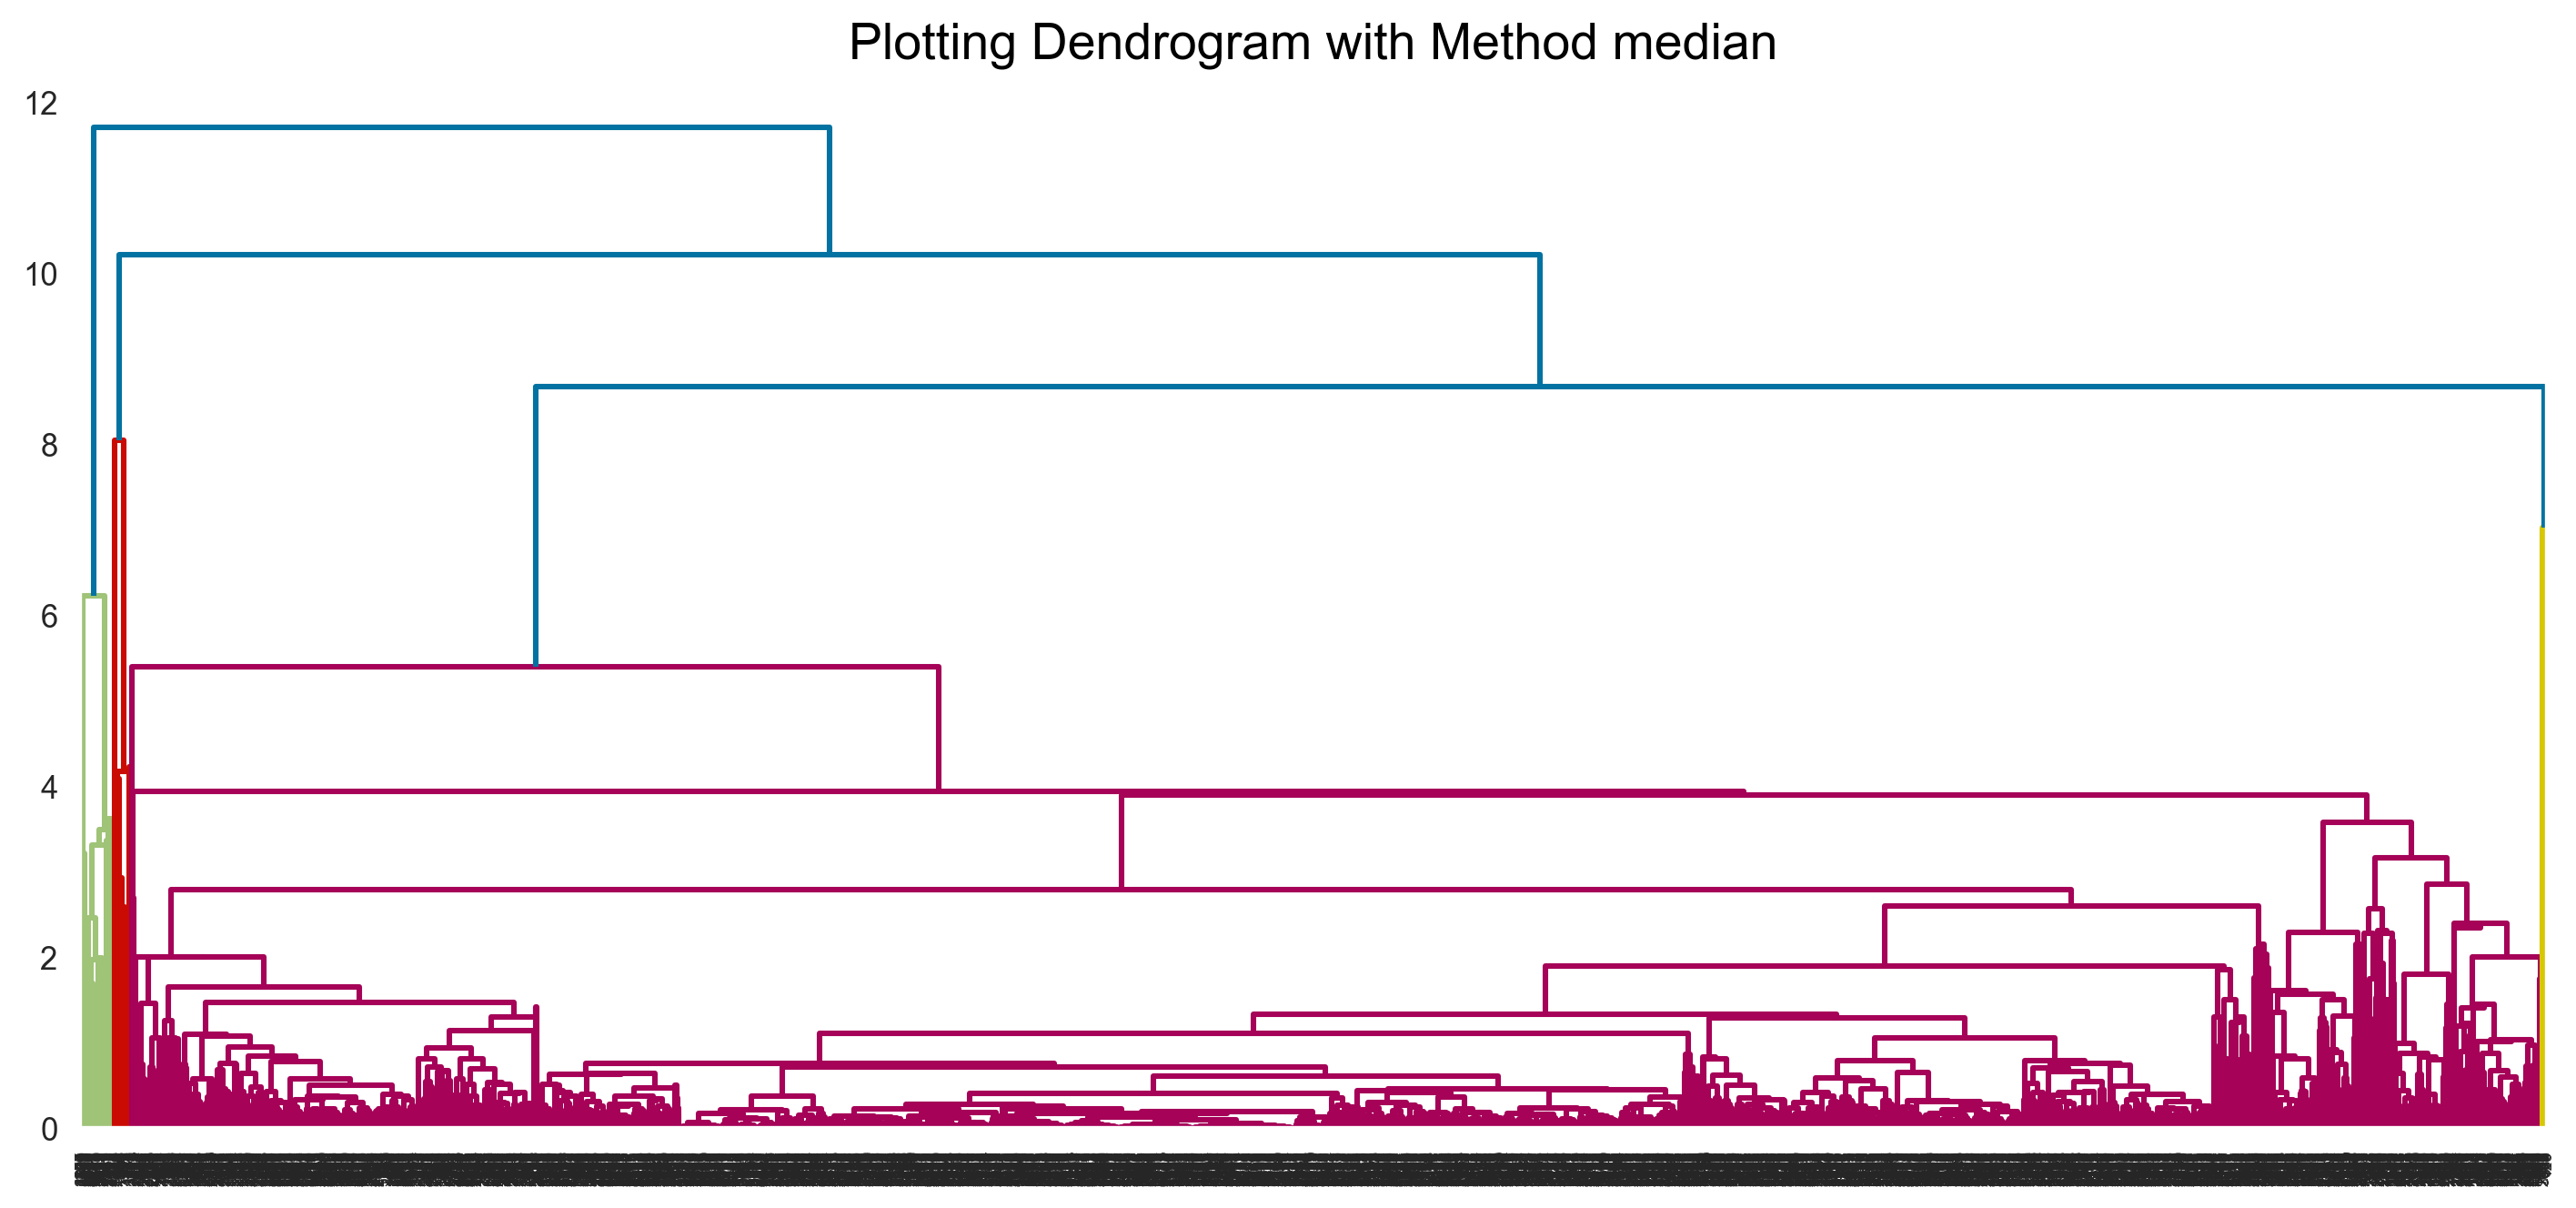

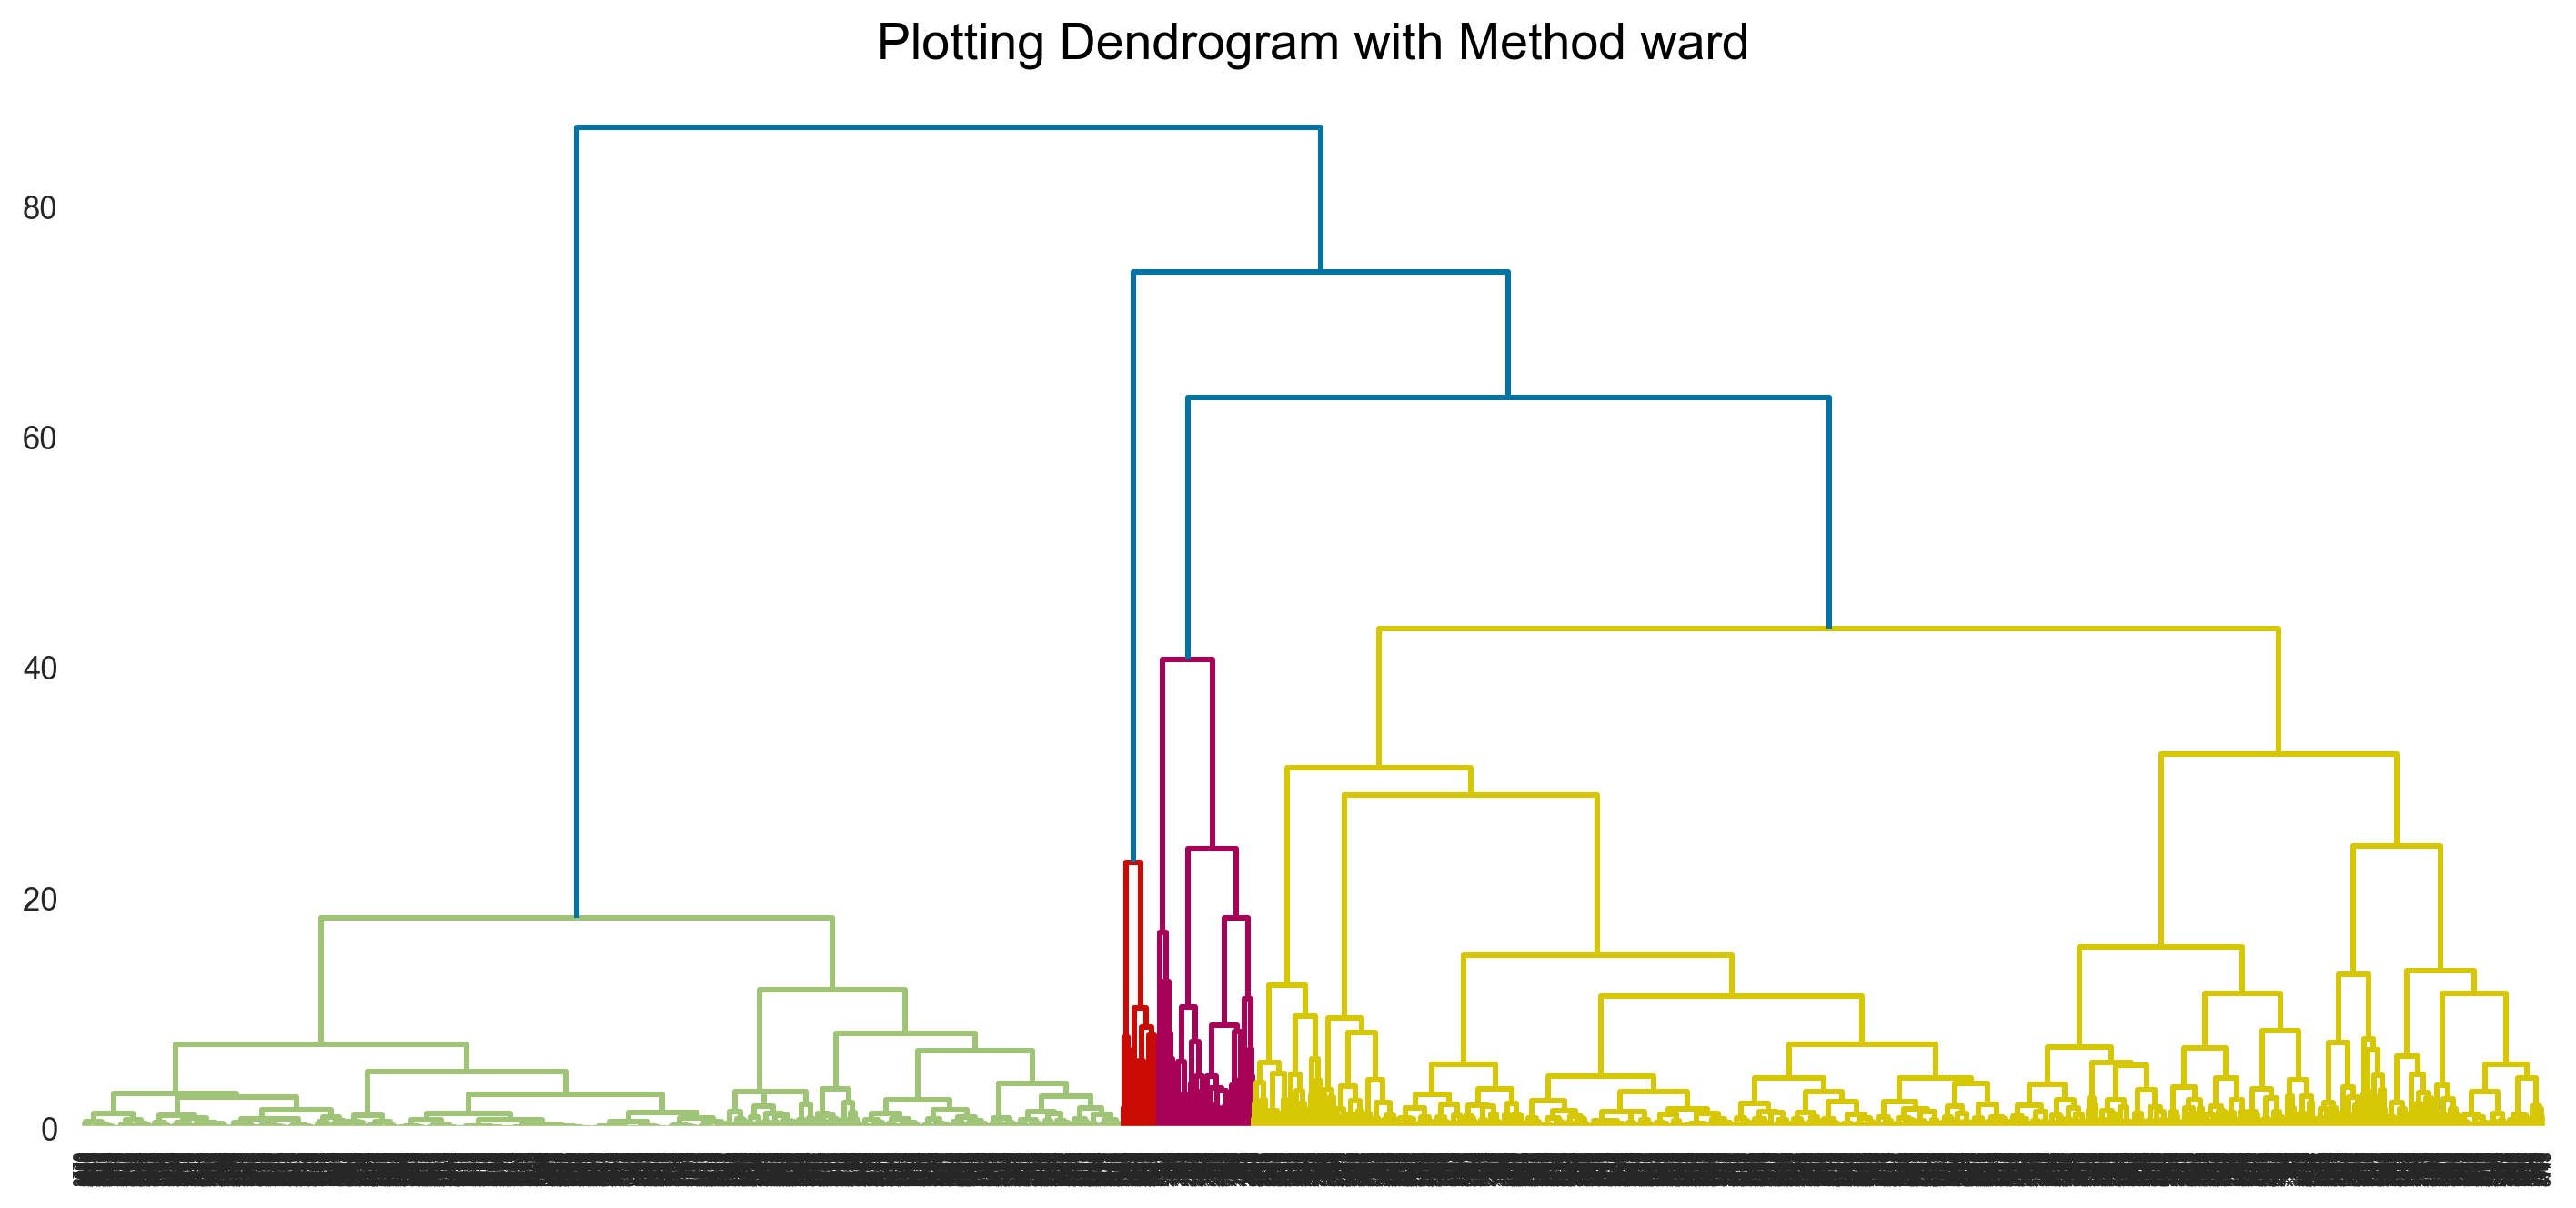

In [ ]:
plot_all_dendrogram(scaled_x)

##### Picking Best Method For Dendrogram

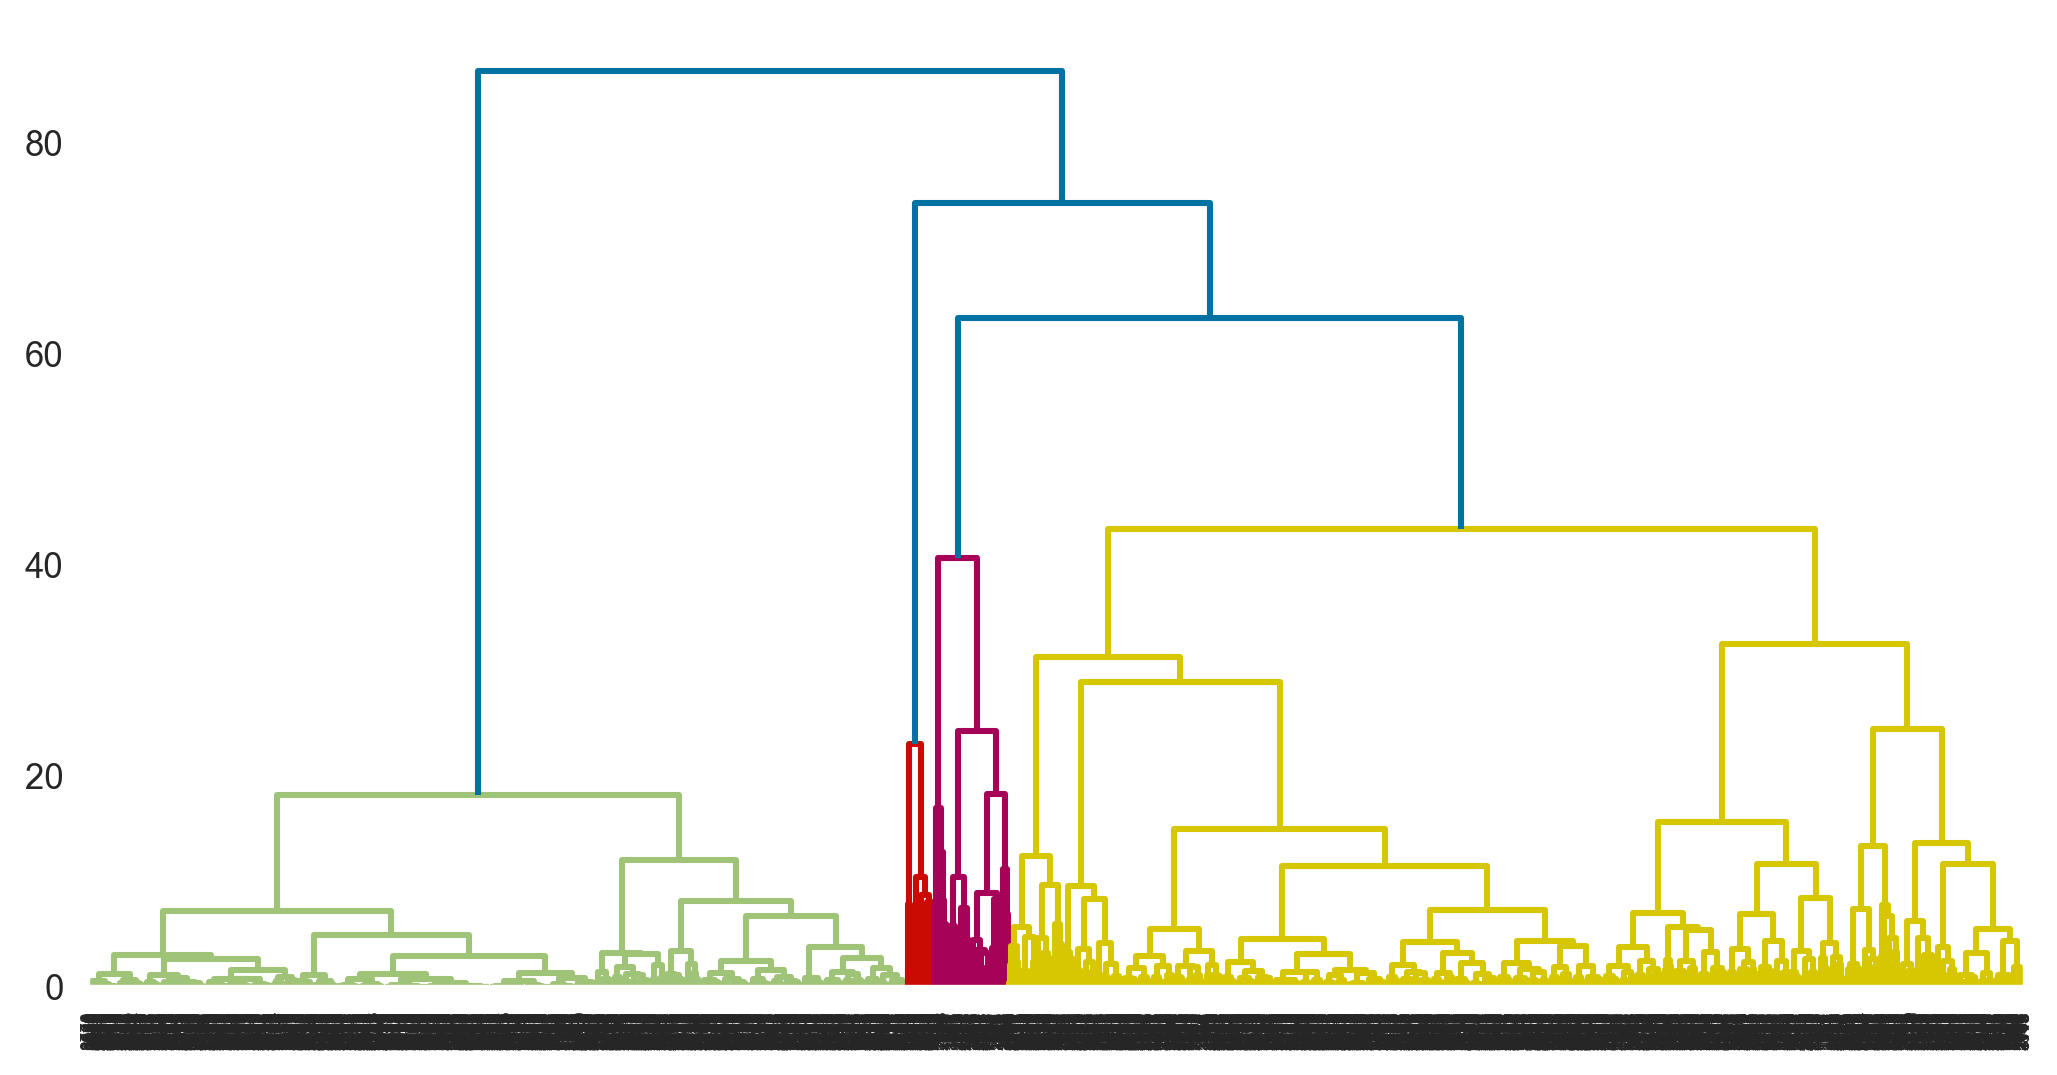

In [ ]:
lk_complete = hierarchy.linkage(scaled_x,method='ward')
dendrogram_complete = hierarchy.dendrogram(lk_complete)
plt.axhline(y = 100 , c = 'violet', linestyle = '--')

#### Preparing Hierarchical Clustering Model

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2)

y_hc = hc.fit_predict(scaled_x)

y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
ewa['Hc_cluster'] = y_hc

ewa.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1               0.00              0.0               7000       0   
1            2               0.00              0.0               6968       0   
2            4               0.00              0.0               7034       0   
3            1               0.00              0.0               6952       0   
4           26             783.75              2.5               6935       1   

   Hc_cluster  
0           1  
1           1  
2           1  
3           1  
4           0

#### Drawing Inferance From Dataset

In [ ]:
ewa.groupby('Hc_cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Hc_cluster                                                               
0           103985.306459   249.81101   2.794105   1.022974    1.02124   
1            32191.961561     0.00000   1.057954   1.002957    1.00000   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Hc_cluster                                                                  
0           27728.014304    17.604248         222.144127         0.724967   
1            2716.564755     3.419870         120.114873         0.409817   

            Days_since_enroll    Award?  
Hc_cluster                               
0                 4457.993932  0.500650  
1                 3656.966292  0.192785

- 0 : Frequent Flyer
- 1 : Non - Frequent Flyer

<AxesSubplot:xlabel='Balance', ylabel='Qual_miles'>

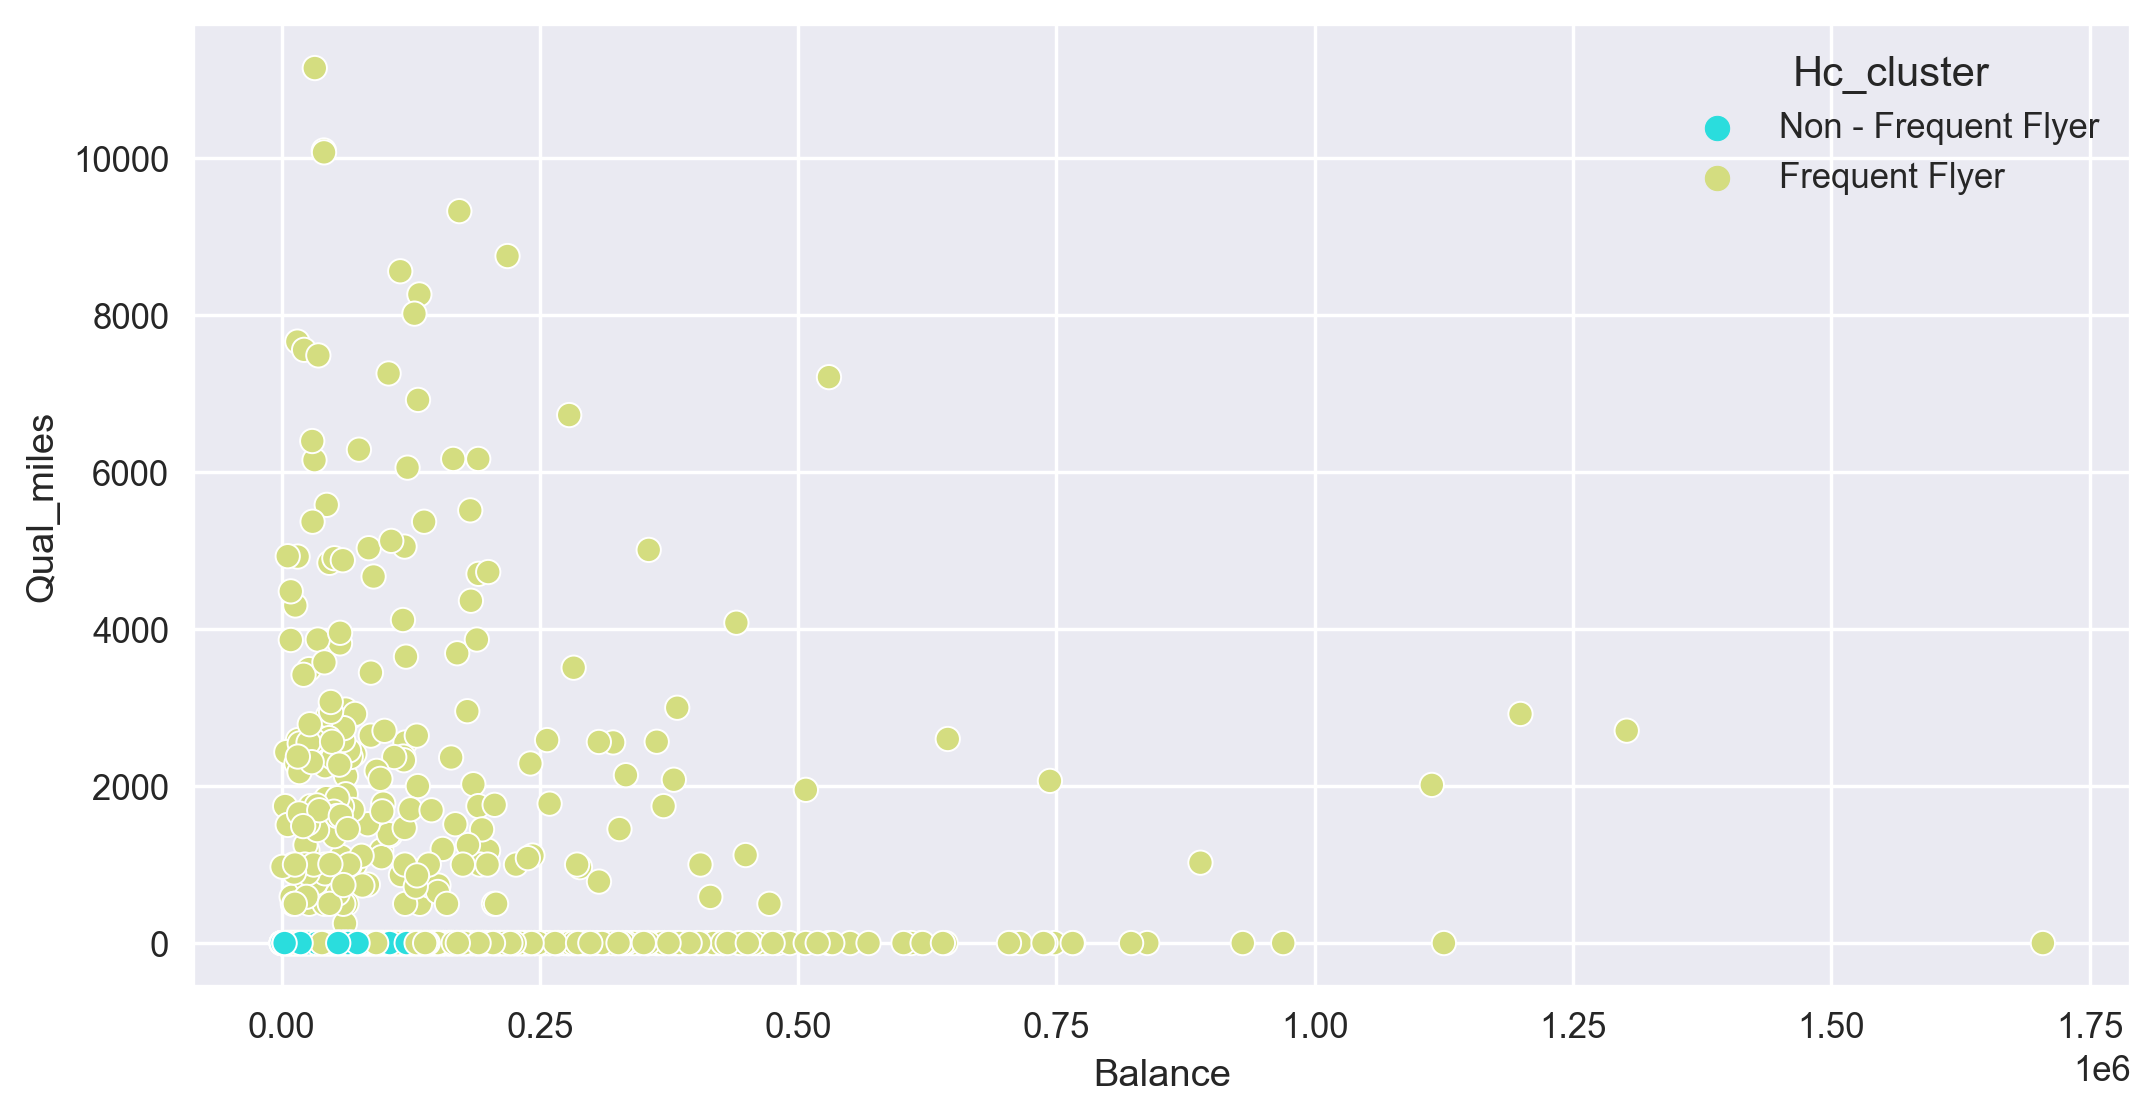

In [ ]:
ewa['Hc_cluster'].replace(to_replace = 0, value = 'Frequent Flyer', inplace = True)
ewa['Hc_cluster'].replace(to_replace = 1, value = 'Non - Frequent Flyer', inplace = True)

sns.scatterplot(ewa['Balance'], ewa['Qual_miles'], hue = ewa['Hc_cluster'], palette = 'rainbow')

#### Evaluating Silhouette Score For Hierarchical Clustering Model

In [ ]:
silhouette_score(x,y_hc)

0.1183385011370826

### Creating Model With K-MEANS Clustering

#### Ploting Elbow Graph

In [ ]:
def plot_elbow_graph(x,n):
    wcss = []
    n = int(n)
    for i in range(1,n):
        km = KMeans(n_clusters=i)
        km.fit_predict(x)
        wcss.append(km.inertia_)

    sns.lineplot(range(1,n), wcss)
    plt.xlabel('K-values')
    plt.ylabel('WCSS')
    plt.title(label = 'Elbow Graph')

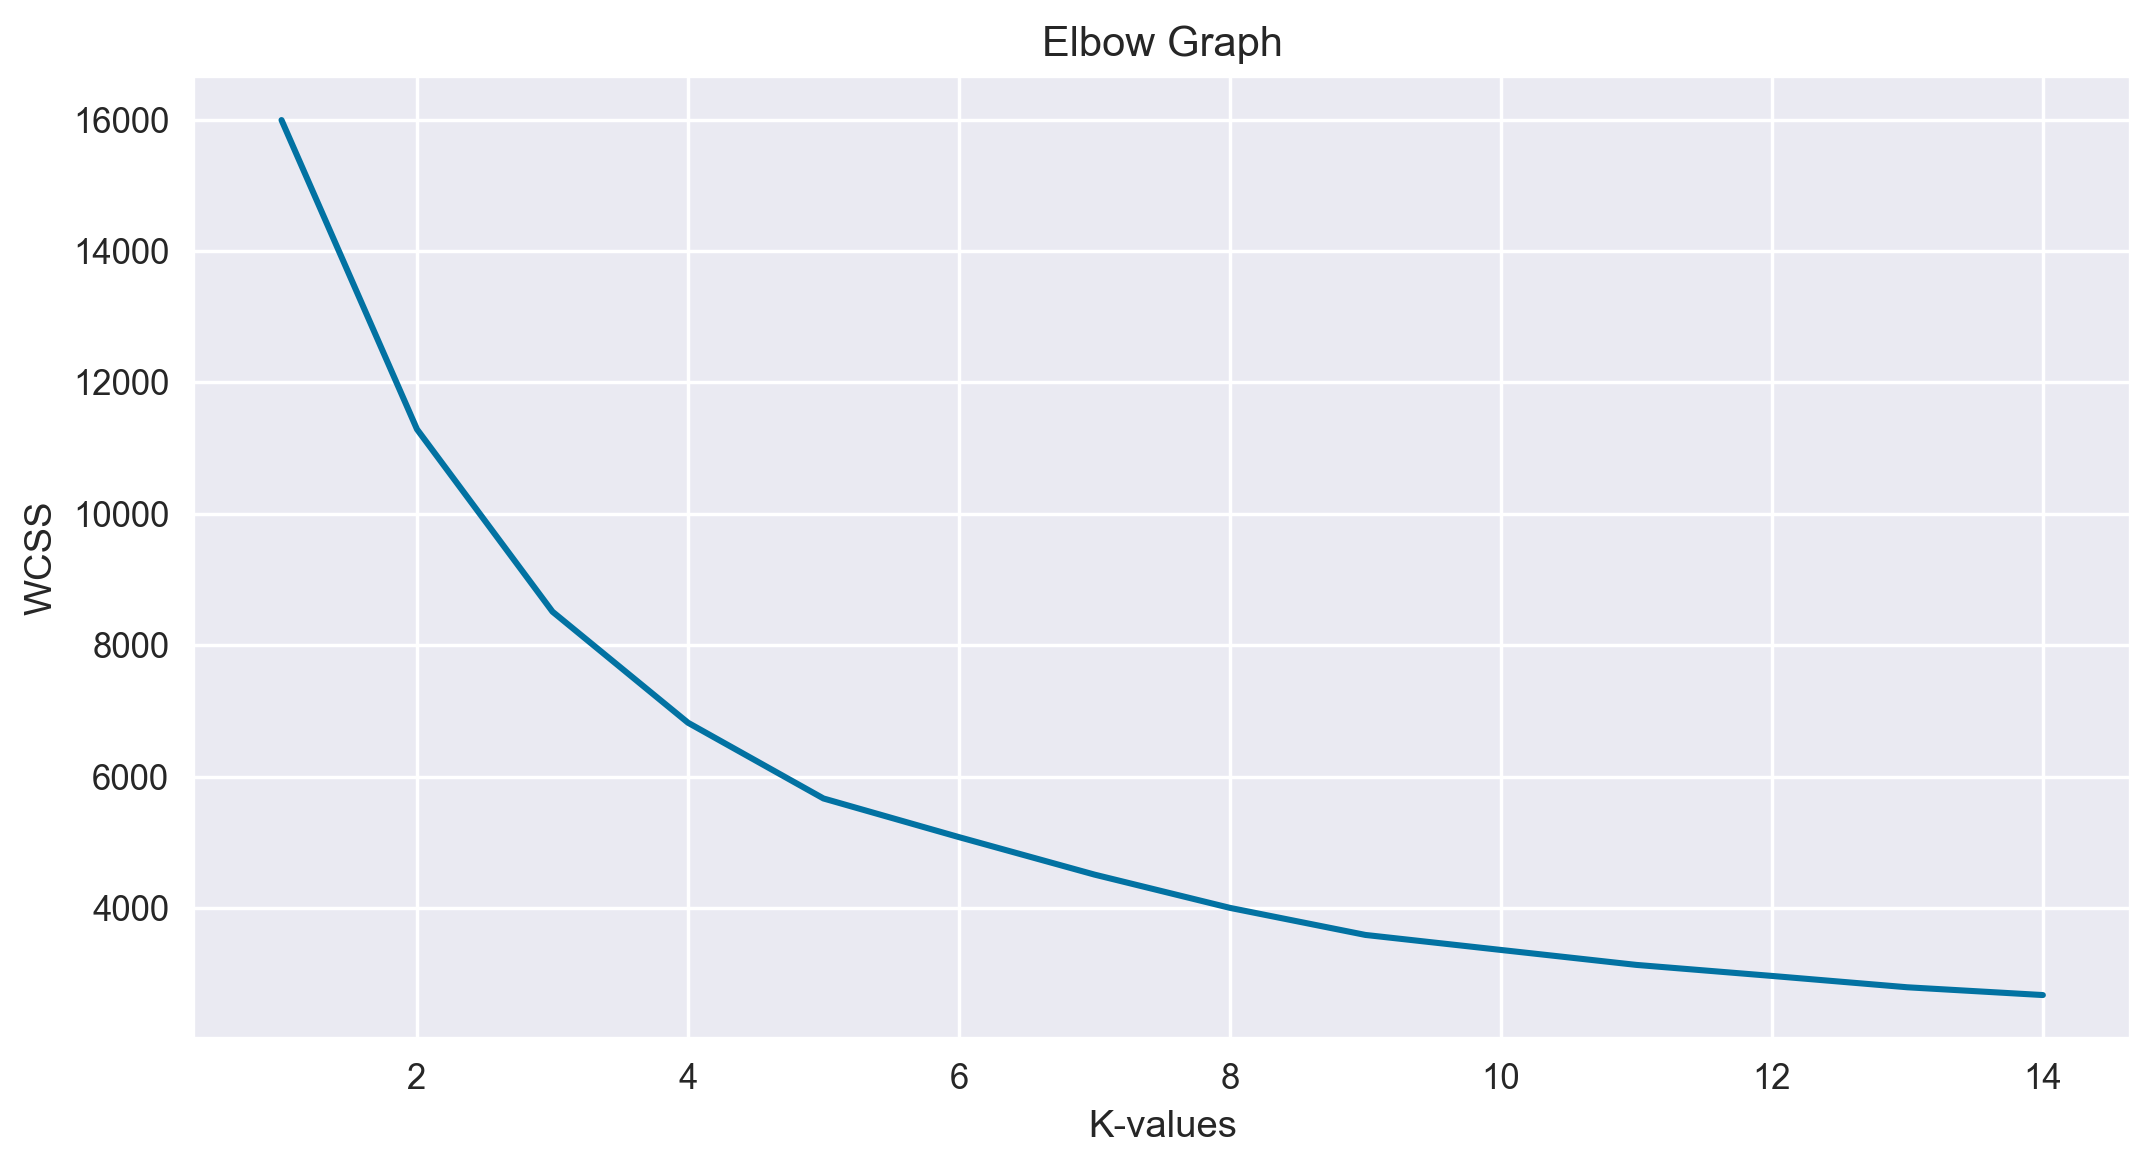

In [ ]:
plot_elbow_graph(scaled_x,15)

#### Preparing K-MEANS Clustering Model

In [ ]:
km = KMeans(n_clusters = 2)
y_km = km.fit_predict(scaled_x)

y_km

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ewa['Km_cluster'] = y_km

ewa.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1               0.00              0.0               7000       0   
1            2               0.00              0.0               6968       0   
2            4               0.00              0.0               7034       0   
3            1               0.00              0.0               6952       0   
4           26             783.75              2.5               6935       1   

             Hc_cluster  Km_cluster  
0  Non - Frequent Flyer           0  
1  Non - Frequent Flyer           0  
2  Non - Frequent Flyer           0  
3  Non - Frequent Flyer           0  
4        Frequent Flyer           1

#### Drawing Inferance From Dataset

In [ ]:
ewa.groupby('Km_cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Km_cluster                                                               
0            43596.764171   79.244227   1.438069   1.016095   1.000350   
1           148886.979825  306.871930   3.618421   1.010526   1.042105   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Km_cluster                                                                  
0            6387.535339     7.586424         128.414626         0.435444   
1           44128.652632    21.678947         305.782237         0.983333   

            Days_since_enroll    Award?  
Km_cluster                               
0                 3835.693842  0.271868  
1                 4829.920175  0.617544

- 0 : Non - Frequent Flyer
- 1 : Frequent Flyer


##### Labeling The Value

In [ ]:
ewa['Km_cluster'].replace(to_replace = 0, value = 'Non - Frequent Flyer', inplace = True)
ewa['Km_cluster'].replace(to_replace = 1, value = 'Frequent Flyer', inplace = True)

##### Ploting Scatter Plot

In [ ]:
km.cluster_centers_

array([[-0.29926428, -0.08382341, -0.44631707, -0.41819339],
       [ 0.74842275,  0.20963192,  1.1161835 ,  1.04584966]])

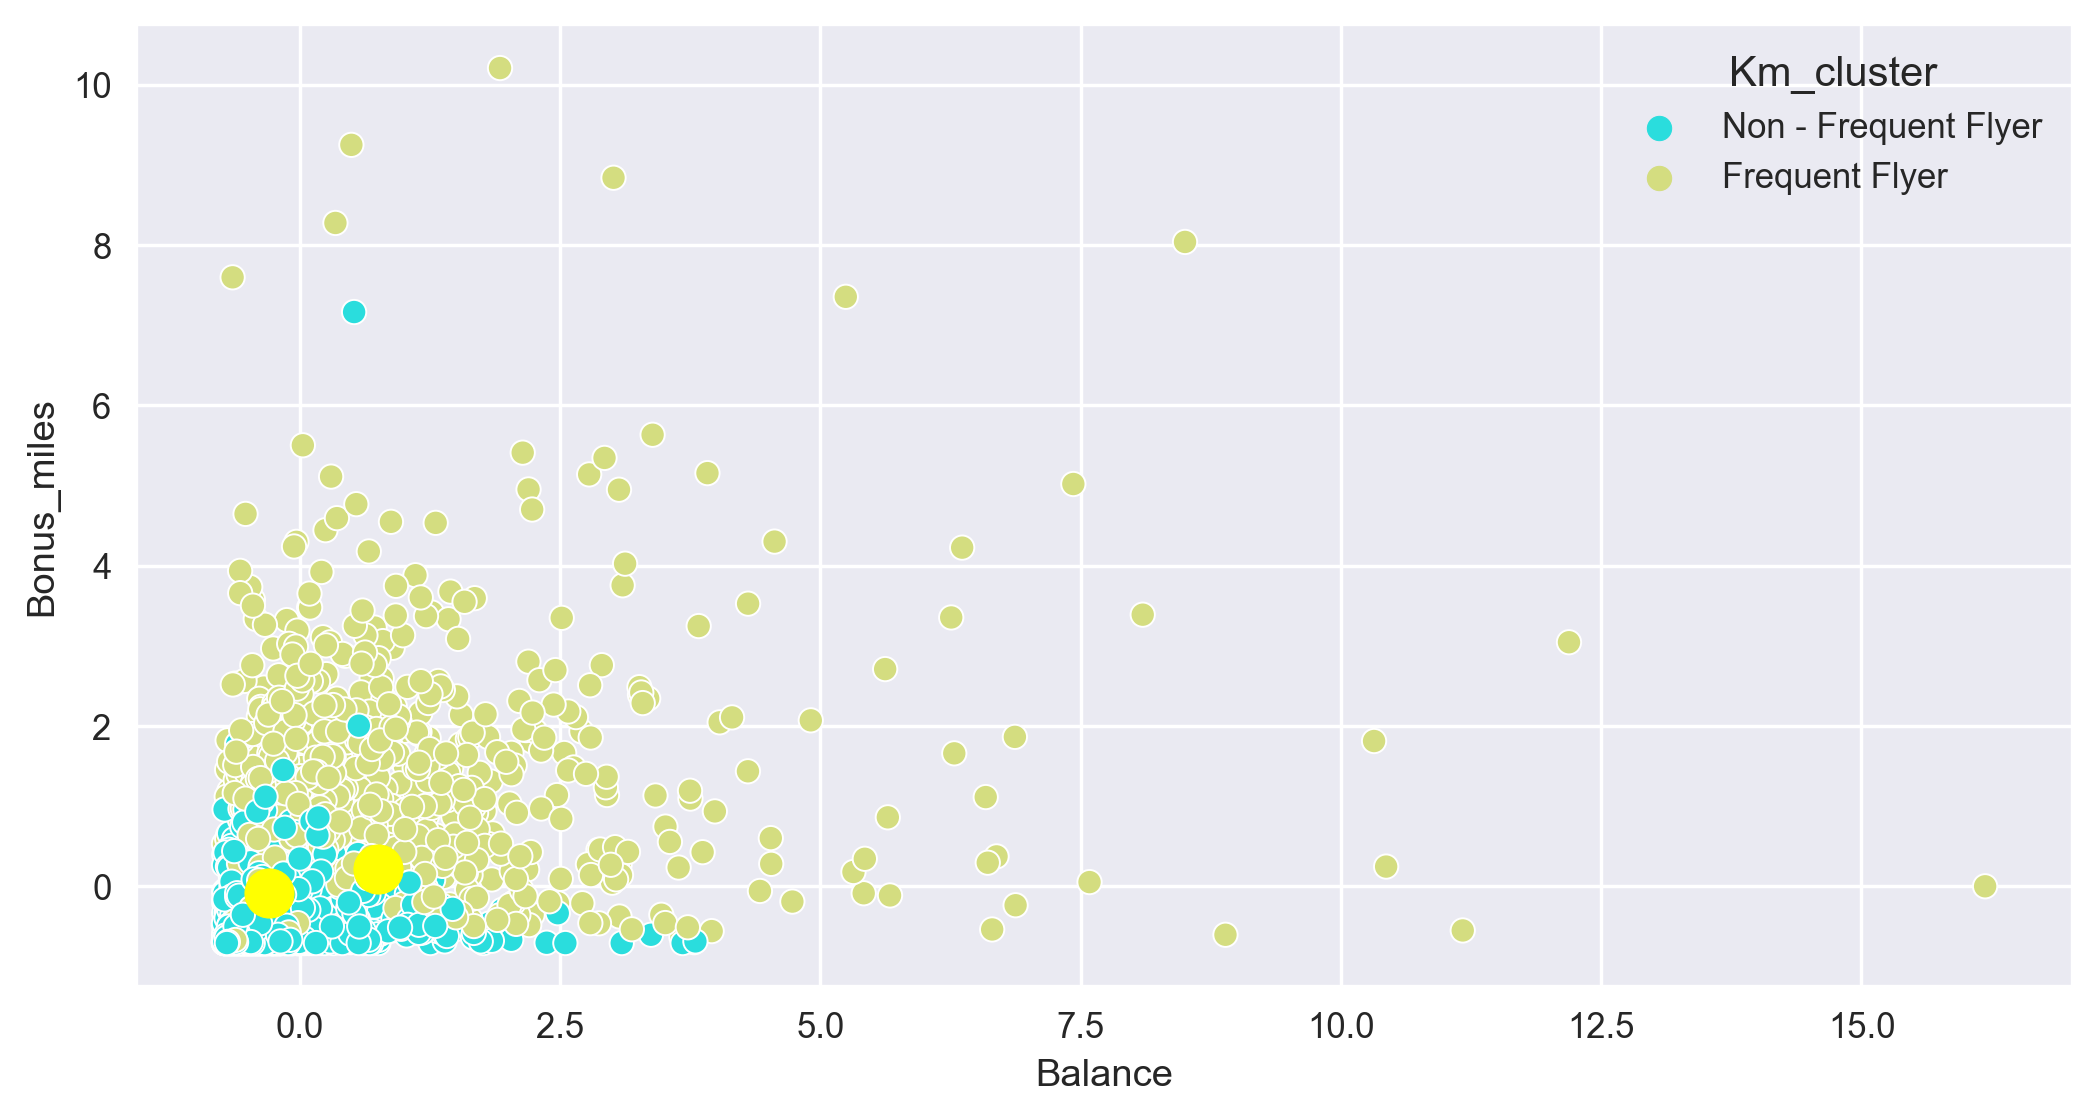

In [ ]:
sns.scatterplot(scaled_x['Balance'], scaled_x['Bonus_miles'], hue = ewa['Km_cluster'], palette = 'rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s = 200, c = 'yellow')

#### Evaluating Silhouette Score For K-MEANS Model

In [ ]:
silhouette_score(x,y_km)

0.42075845127300004

##### Ploting Silhouette Plot

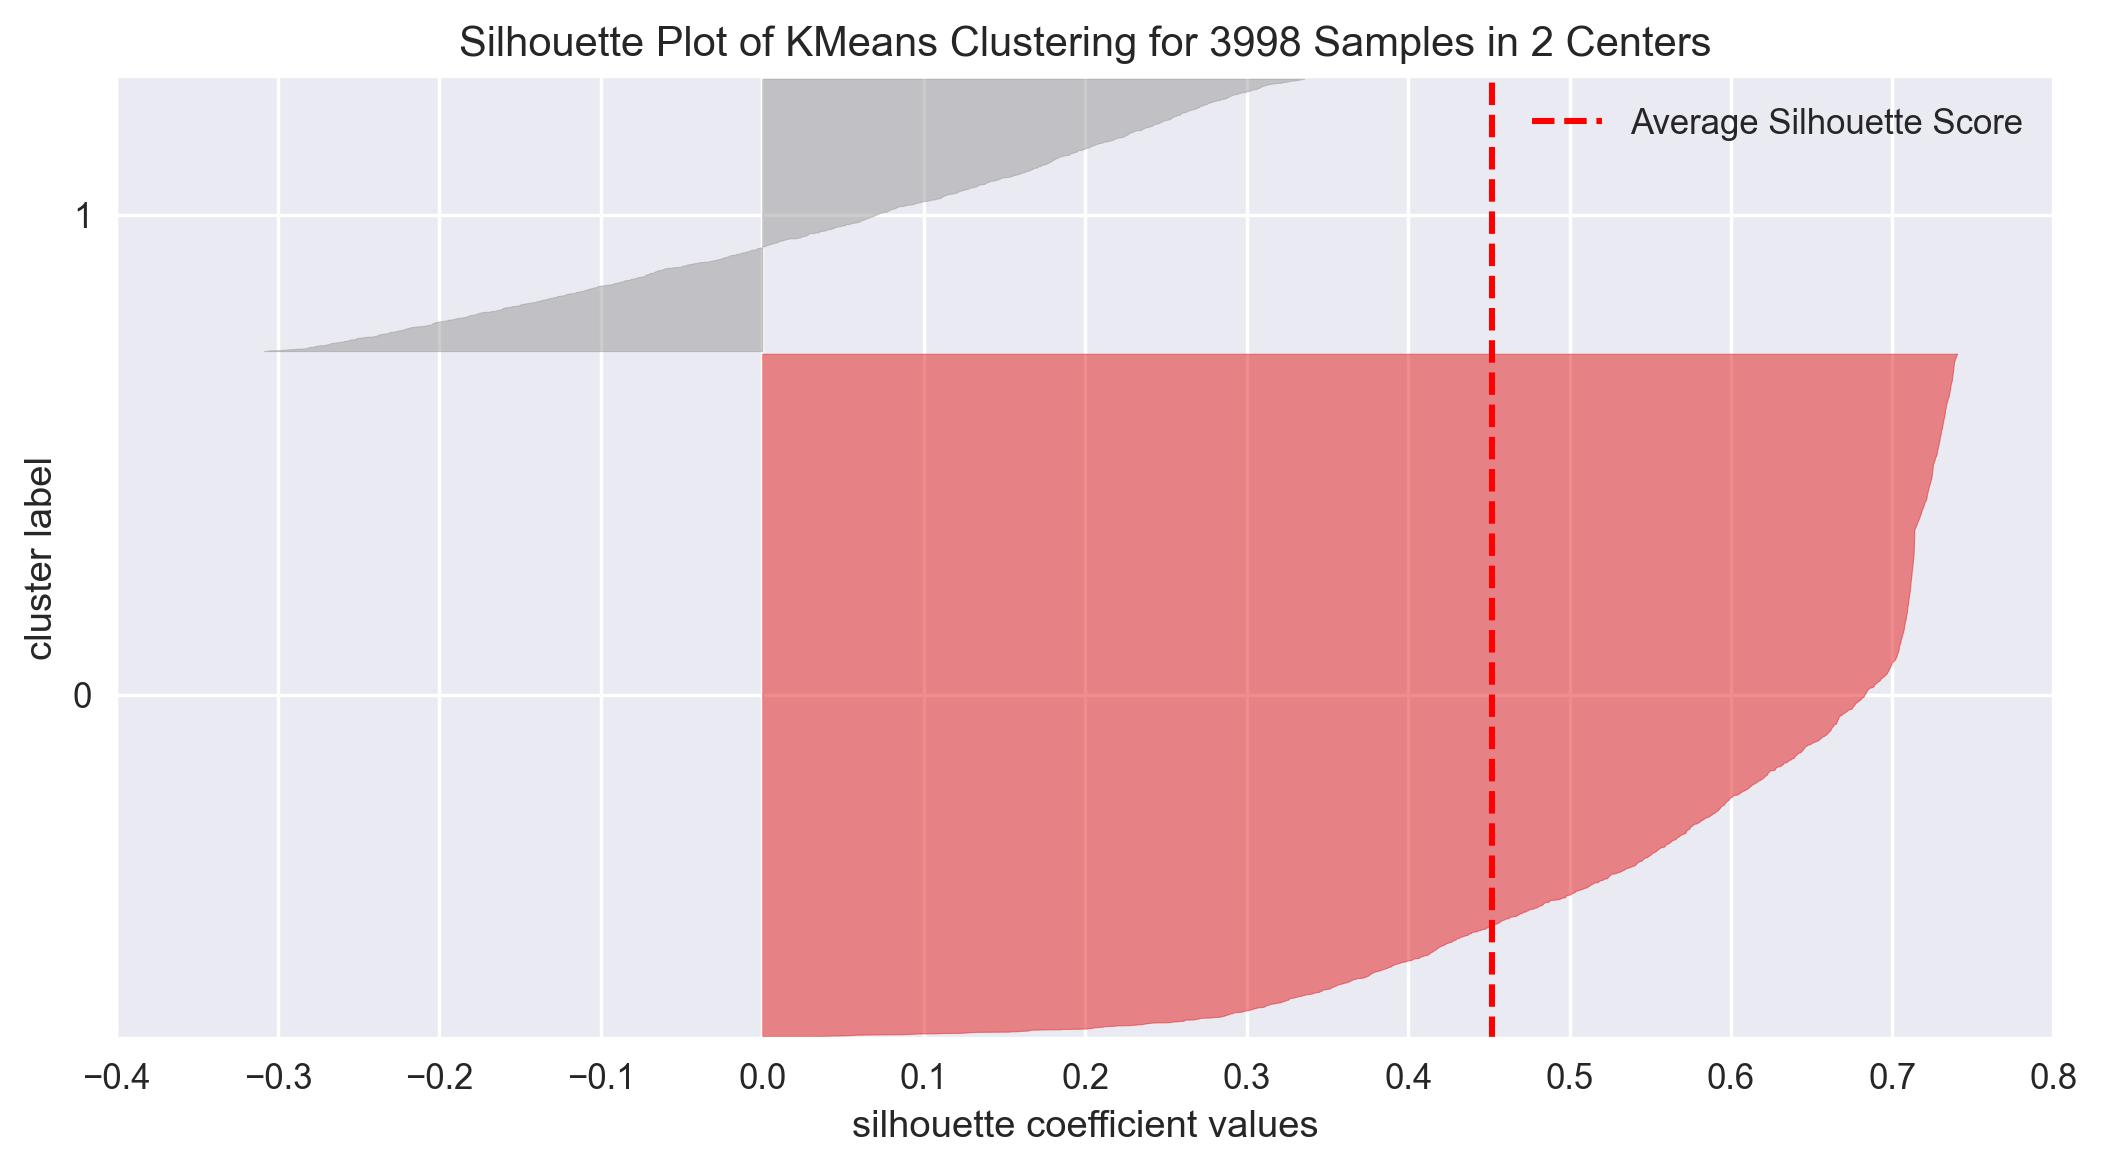

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3998 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
vis = SilhouetteVisualizer(km)

vis.fit(scaled_x)
vis.show()

### Creating Model With DB-SCAN Clustering

#### Ploting K-Dist Plot

In [ ]:
neigh = NearestNeighbors(n_neighbors = 5).fit(scaled_x)
dist, ind = neigh.kneighbors(scaled_x)

In [ ]:
pd.DataFrame(dist)

0         1         2         3         4
0     0.0  0.006285  0.010680  0.011979  0.015996
1     0.0  0.001600  0.010906  0.021891  0.024717
2     0.0  0.024759  0.026467  0.039225  0.060256
3     0.0  0.000069  0.002798  0.007879  0.008866
4     0.0  0.143247  0.208715  0.321869  0.349012
...   ...       ...       ...       ...       ...
3993  0.0  0.103800  0.104800  0.106495  0.109487
3994  0.0  0.037519  0.066845  0.067523  0.081339
3995  0.0  0.131493  0.135676  0.154033  0.199810
3996  0.0  0.019192  0.019311  0.022604  0.024402
3997  0.0  0.000327  0.000486  0.000655  0.001121

[3998 rows x 5 columns]

Text(0.5, 1.0, 'K-dist Plot')

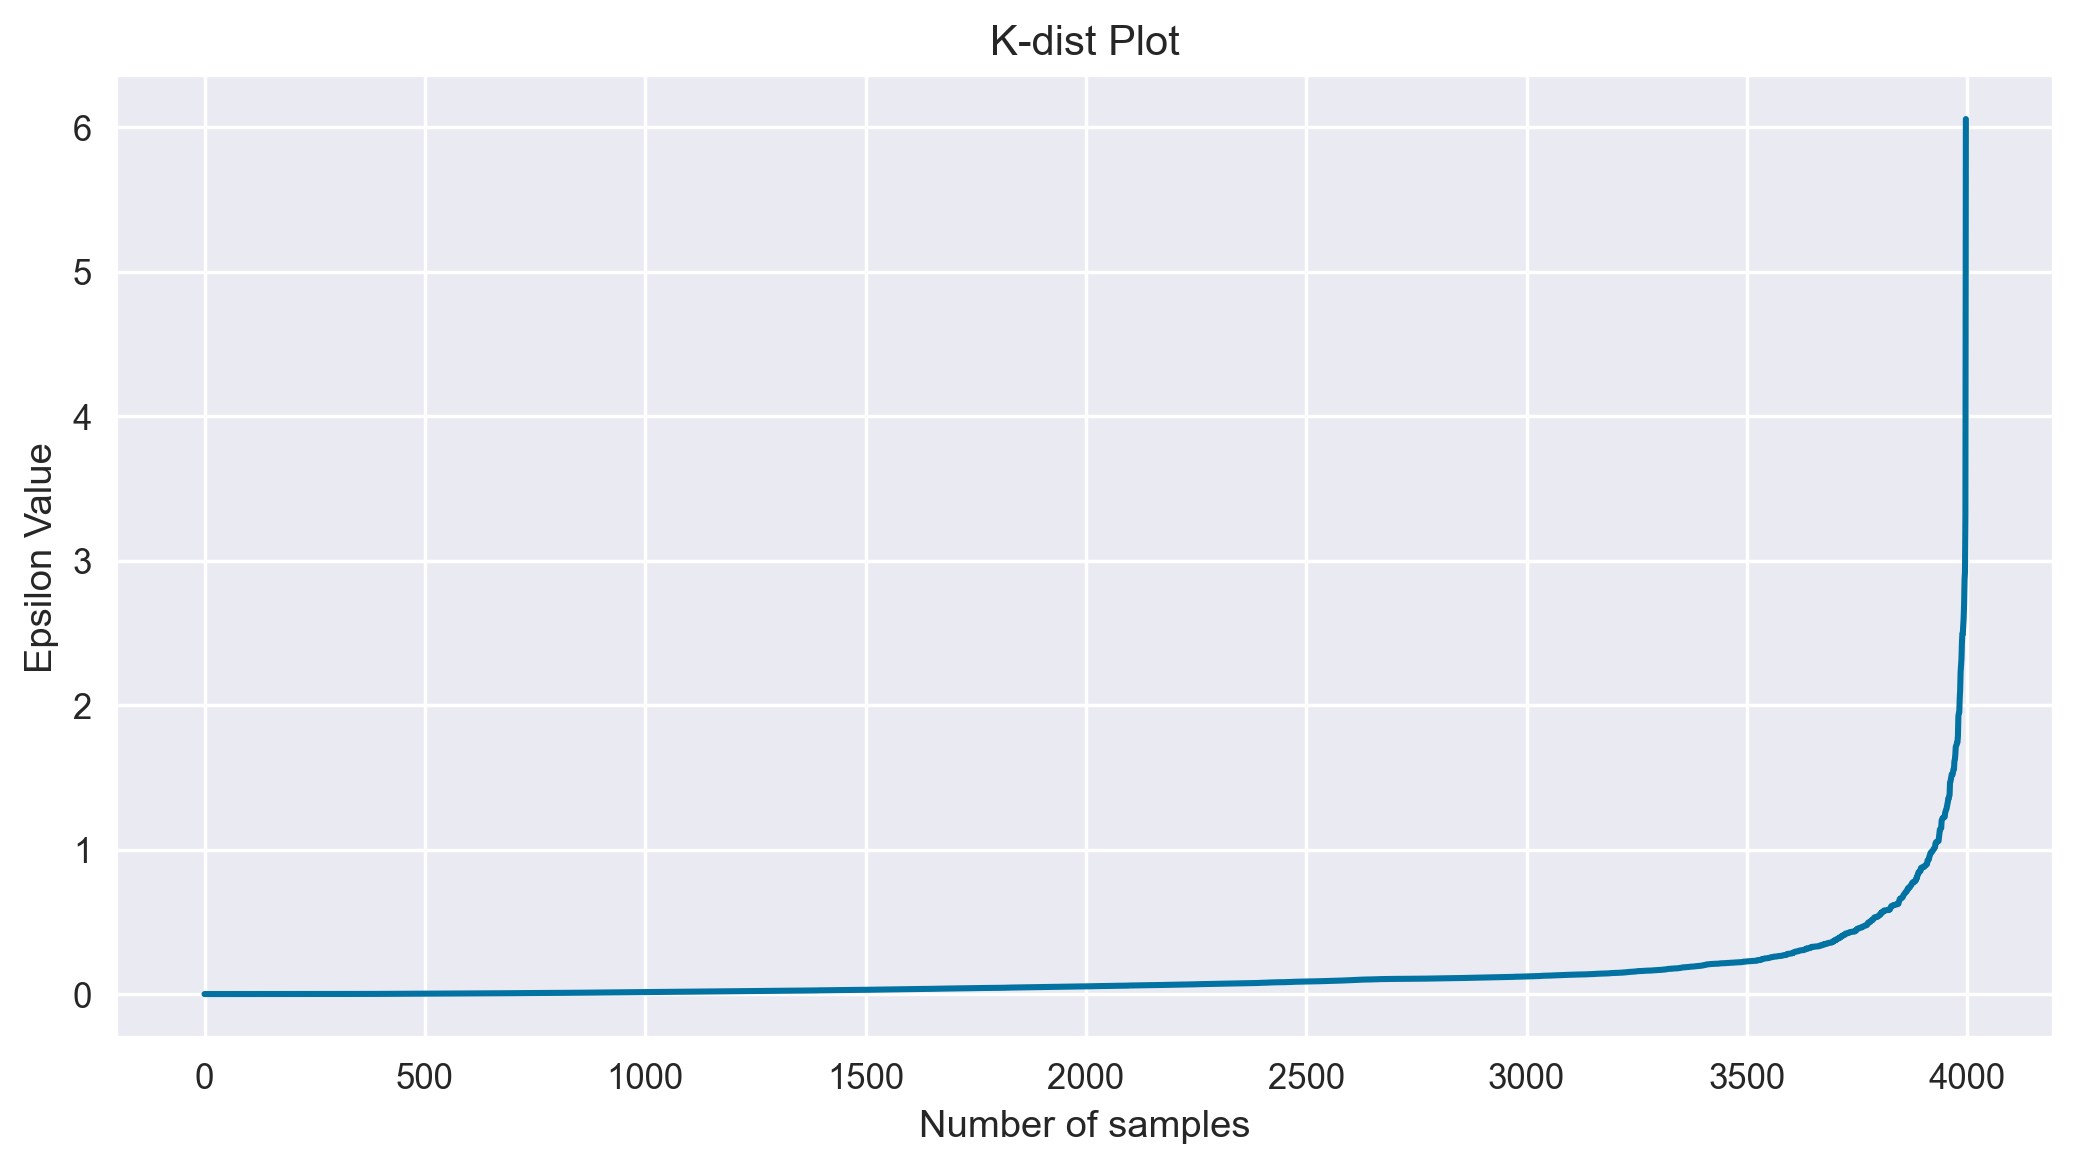

In [ ]:
distance = np.sort(dist[:,1], axis = 0)

plt.plot(distance)
plt.xlabel('Number of samples')
plt.ylabel('Epsilon Value')
plt.title('K-dist Plot')

#### Preparing DB-SCAN Model

In [ ]:
db = DBSCAN(eps = 0.9, min_samples = 8)
y_db = db.fit_predict(scaled_x)

y_db

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
ewa['Db_cluster'] = y_db

ewa.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1               0.00              0.0               7000       0   
1            2               0.00              0.0               6968       0   
2            4               0.00              0.0               7034       0   
3            1               0.00              0.0               6952       0   
4           26             783.75              2.5               6935       1   

             Hc_cluster            Km_cluster  Db_cluster  
0  Non - Frequent Flyer  Non - Frequent Flyer           0  
1  Non - Frequent Flyer  Non - Frequent Flyer           0  
2  Non - Frequent Flyer  Non - Frequent Flyer           0  
3  Non - Frequent Flyer  Non - Frequent Flyer           0  
4        Frequent Flyer        Frequent Flyer           0

#### Drawing Inferance From Dataset

In [ ]:
ewa.groupby('Db_cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Db_cluster                                                                
-1          296393.814371  2355.329341   3.149701   1.023952   1.071856   
 0           63908.363874    47.761420   2.012268   1.014096   1.009658   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Db_cluster                                                                  
-1          57594.784431    23.389222         528.631737         1.721557   
 0          15386.037849    11.091099         163.748173         0.542417   

            Days_since_enroll    Award?  
Db_cluster                               
-1                5001.964072  0.796407  
 0                4080.708431  0.351866

- -1 : Outlier
- 0 : Frequent Flyer

##### Labeling The Value

In [ ]:
ewa['Db_cluster'].replace(to_replace = 0, value = 'Frequent Flyer', inplace = True)
ewa['Db_cluster'].replace(to_replace = -1, value = 'Outlier', inplace = True)

##### Ploting Scatter Plot

<AxesSubplot:xlabel='Balance', ylabel='Qual_miles'>

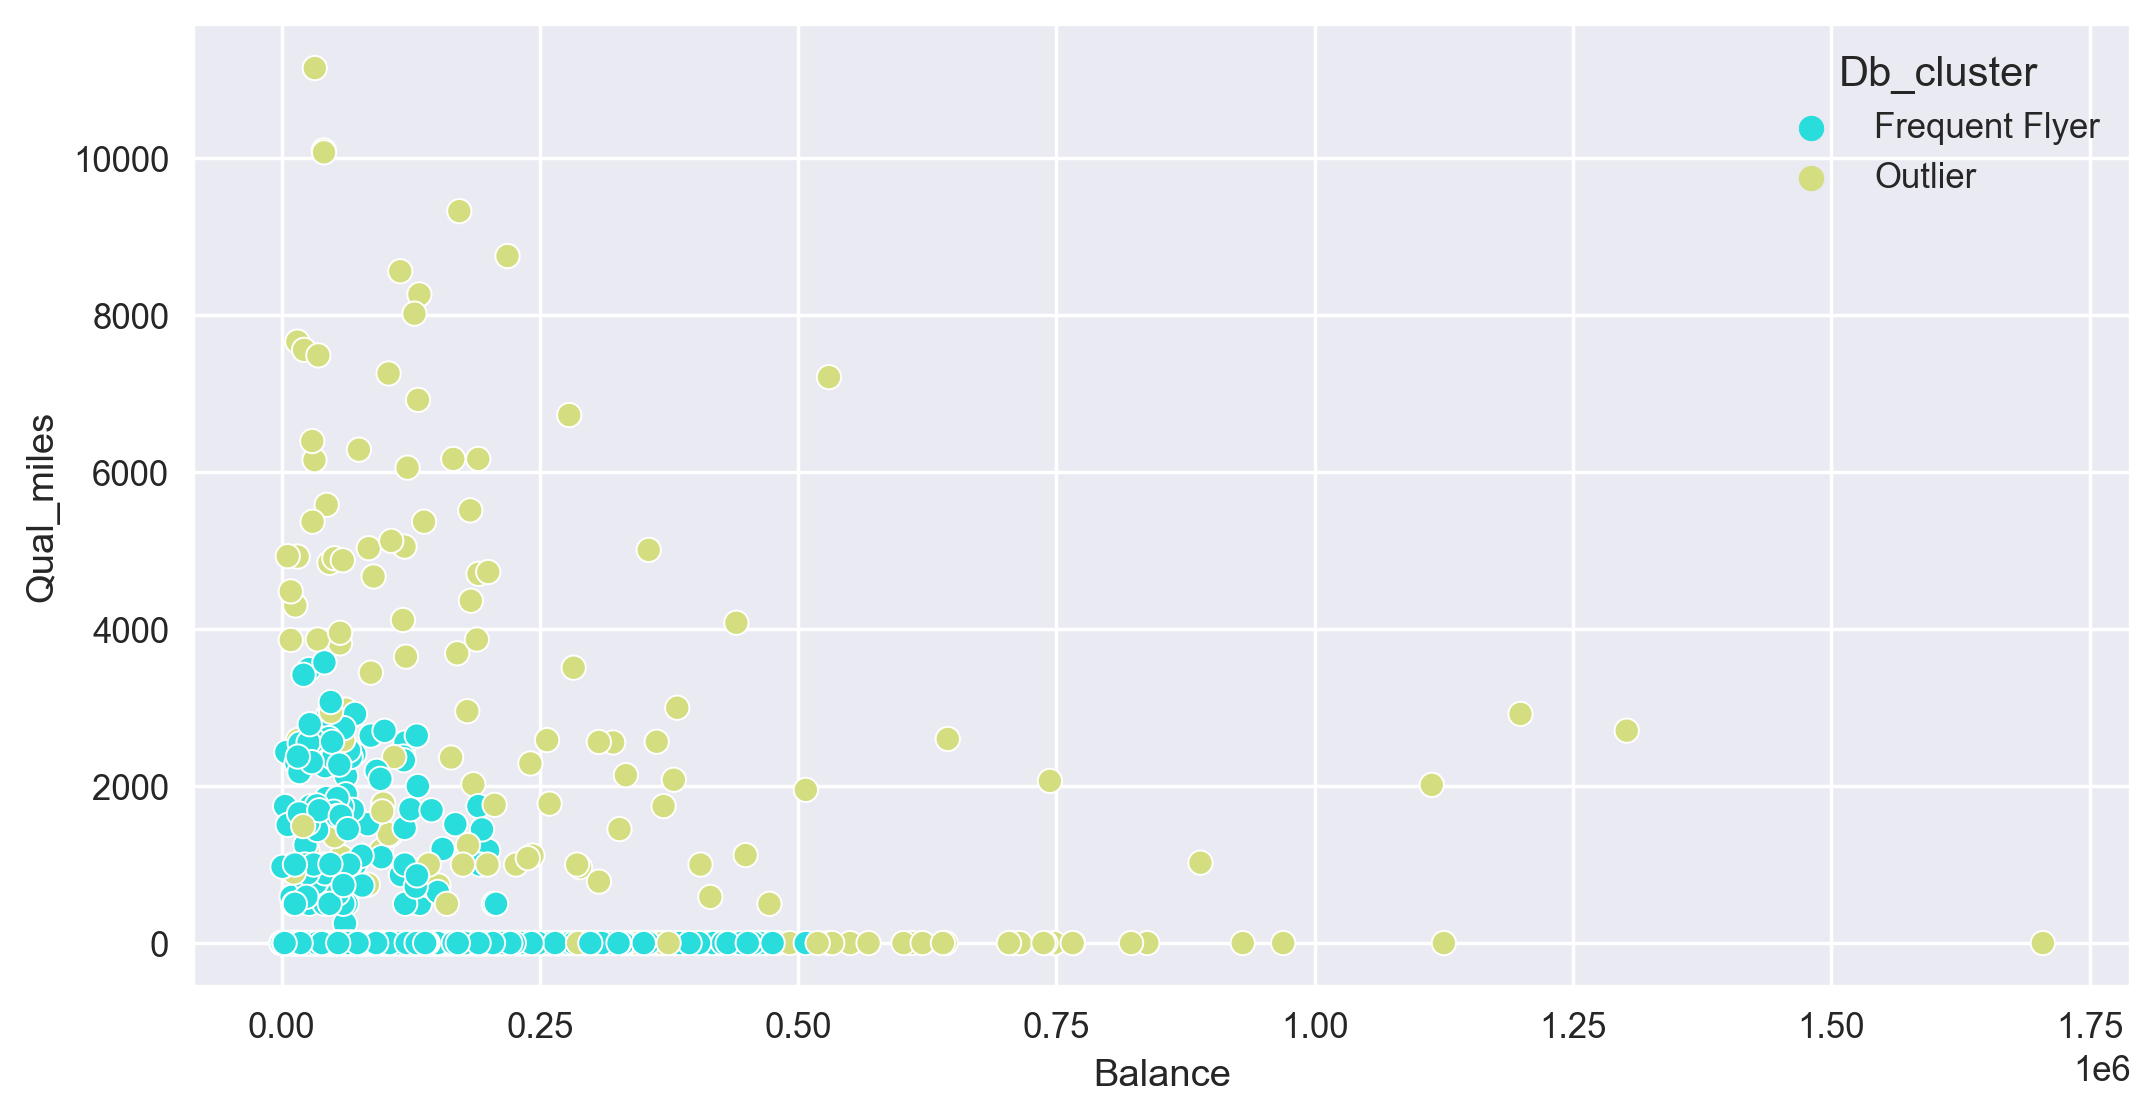

In [ ]:
sns.scatterplot(ewa['Balance'], ewa['Qual_miles'], hue = ewa['Db_cluster'], palette = 'rainbow')

#### Evaluating Silhouette Score For DB-SCAN Model

In [ ]:
silhouette_score(x,y_db)

0.6835836924162139